# Prediction system : Items + Revenue


<br>

## By GOData _ 4DS1

#### - Allaoui Hayfa
#### - Ben Othmen Ons
#### - Chandoul Wejdene
#### - Ghdiri Oussama 
#### - Masmoudi Skander
#### - Sabbagh Wiem

<br>

## Introduction

Today, up to 65% of business owners already admit that leveraging big data makes their organizations more competitive. Spending on big data is projected to reach $114 billion in 2018.*
In this context, "Mitakus Analystics" help chefs and owners of canteens, restaurants and other gastronomy businesses with actionable analytics and business insights to grow their business by helping them in the desicion making, analysing the trends, optimize spending and make more profit.
This constant analysis and reflection using data science provides a deep understanding of the market’s response to your company’s products and services. By taking a hard look at how your product is being used the most, you can rethink your model to ensure you’re offering the solutions that your customers need.


*entrepreneur.com

<br>

## Data Understanding 

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
import csv
import squarify
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.tools import FigureFactory as FF
import datetime
import json
import plotly
import re
from plotly.offline import init_notebook_mode, plot
plotly.tools.set_credentials_file(username='ons_bno', api_key='rh3dS9mQkIvEBwIOzmtU')
pd.set_option('display.max_columns',25)
init_notebook_mode(connected=True)
import xlrd
import webcolors

### Reading the data

In [2]:
data2011 = pd.read_table('./Dataz/Data2011.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);
data2012 = pd.read_table('./Dataz/Data2012.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);
data2013 = pd.read_table('./Dataz/Data2013.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);
data2014 = pd.read_table('./Dataz/Data2014.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);
data2015 = pd.read_table('./Dataz/Data2015.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);
data2016 = pd.read_table('./Dataz/Data2016.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);
data2017 = pd.read_table('./Dataz/Data2017.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True,usecols=range(24));
data2018 = pd.read_table('./Dataz/Data2018.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True,usecols=range(24));

C:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



#### 2011

In [114]:
data2011.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,03.01.2011,07:29,1,1195883,6,K/C,13753,11,0,NaN,1,100,V,511,7.0,1,1.00,"Backwaren 1,00",5.54,1.00,776,0,1,NaN
1,03.01.2011,07:30,1,1195884,6,K/C,17150,11,0,NaN,1,100,V,1211,7.0,1,0.96,Leberkäse Semmel,4.16,0.96,3774,128,1,NaN
2,03.01.2011,07:30,1,1195884,6,K/C,17150,11,0,NaN,1,100,V,500,7.0,1,0.20,Semmeln,4.16,0.20,3774,0,1,NaN
3,03.01.2011,07:34,1,1195885,6,K/C,79210,2,0,NaN,2,100,V,1213,7.0,1,2.03,Leberkäse Teller,12.61,1.62,939,216,1,NaN
4,03.01.2011,07:34,1,1195885,6,K/C,79210,2,0,NaN,2,100,V,500,7.0,1,0.25,Semmeln,12.61,0.20,939,0,1,NaN


In [115]:
data2011.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
3255279,29.12.2011,08:32,60205,12580,0,K/C,130462,11,0,0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,1.7,0.3,326,0,1,NaN
3255280,30.12.2011,10:59,60205,12581,0,K/C,130462,11,0,0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,0.9,0.3,329,0,1,NaN
3255281,30.12.2011,11:00,60205,12582,0,K/C,130462,11,0,0,1,100,V,71700,19.0,1,0.2,Kaffee Witt.,0.7,0.2,330,0,1,NaN
3255282,30.12.2011,16:15,60205,12583,0,K/C,130462,11,0,0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,0.4,0.3,331,0,1,NaN
3255283,30.12.2011,16:16,60205,12584,0,K/C,130462,11,0,0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,0.1,0.3,332,0,1,NaN


In [116]:
print ("This dataset has {} samples with {} features each.".format(data2011.shape[0], data2011.shape[1]))

This dataset has 3255284 samples with 24 features each.


In [117]:
data2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255284 entries, 0 to 3255283
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(5), int64(13), object(6)
memory usage: 596.1+ MB


#### 2012

In [118]:
data2012.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,02.01.2012,07:31,1,1258436,13,K/C,30823,11,0,NaN,1,100,V,602,7.0,1,0.85,"Croissant 0,90",9.43,0.85,707,0,1,NaN
1,02.01.2012,07:31,1,1258437,13,K/C,74071,2,0,NaN,2,100,V,507,7.0,1,0.44,"Breze 0,65",15.36,0.35,1174,0,1,NaN
2,02.01.2012,07:31,1,1258437,13,K/C,74071,2,0,NaN,2,100,V,1200,7.0,1,0.81,Paar Wiener,15.36,0.65,1174,0,1,NaN
3,02.01.2012,07:31,1,1258438,13,K/C,10861,11,0,NaN,1,100,V,506,7.0,1,0.40,"Kornsemmel 0,40",3.36,0.40,768,0,1,NaN
4,02.01.2012,07:31,1,1258439,13,K/C,45353,11,0,NaN,1,100,V,507,7.0,1,0.35,"Breze 0,65",8.21,0.35,3526,0,1,NaN


In [119]:
data2012.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
3005415,28.12.2012,08:29,60205,15554,0,K/C,127140,11,0,0,1,100,V,71700,19.0,1,0.2,Kaffee Witt.,12.80,0.2,2946,0,1,NaN
3005416,28.12.2012,09:48,60205,15555,0,K/C,127140,11,0,0,1,100,V,71700,19.0,1,0.2,Kaffee Witt.,12.60,0.2,2947,0,1,NaN
3005417,28.12.2012,10:05,60205,15556,0,K/C,102943,2,0,0,2,100,V,71700,19.0,1,0.2,Kaffee Witt.,6.33,0.2,15,0,1,NaN
3005418,28.12.2012,10:44,60205,15557,0,K/C,117341,11,0,0,1,100,V,71700,19.0,1,0.2,Kaffee Witt.,2.91,0.2,3006,0,1,NaN
3005419,28.12.2012,12:02,60205,15558,0,K/C,102172,2,0,0,2,100,V,71700,19.0,1,0.2,Kaffee Witt.,10.27,0.2,128,0,1,NaN


In [120]:
print ("This dataset has {} samples with {} features each.".format(data2012.shape[0], data2012.shape[1]))

This dataset has 3005420 samples with 24 features each.


In [121]:
data2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005420 entries, 0 to 3005419
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(5), int64(13), object(6)
memory usage: 550.3+ MB


#### 2013

In [122]:
data2013.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,02.01.2013,07:25,1,1331376,3,K/C,30823,11,0,NaN,1,100,V,500,7.0,1,0.20,Semmeln,6.7,0.20,1133,0,1,NaN
1,02.01.2013,07:25,1,1331376,3,K/C,30823,11,0,NaN,1,100,V,602,7.0,1,0.85,"Croissant 0,90",6.7,0.85,1133,0,1,NaN
2,02.01.2013,07:25,1,1331376,3,K/C,30823,11,0,NaN,1,100,V,809,19.0,1,0.65,O-Saft frisch,6.7,0.65,1133,0,1,NaN
3,02.01.2013,07:25,1,1331376,3,K/C,30823,11,0,NaN,1,100,V,1021,7.0,1,0.25,Port. Butter Honig ec,6.7,0.25,1133,0,1,NaN
4,02.01.2013,07:25,1,1331376,3,K/C,30823,11,0,NaN,1,100,V,1021,7.0,1,0.25,Port. Butter Honig ec,6.7,0.25,1133,0,1,NaN


In [123]:
data2013.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
2929803,01.10.2013,13:27,60205,17572,0,K/C,117180,11,0,0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,3.43,0.3,1076,0,1,NaN
2929804,01.10.2013,13:28,60205,17573,0,K/C,117180,11,0,0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,3.13,0.3,1077,0,1,NaN
2929805,01.10.2013,14:06,60205,17574,0,K/C,102172,2,0,0,2,100,V,71702,19.0,1,0.3,Cappucino Witt.,1.25,0.3,405,0,1,NaN
2929806,01.10.2013,16:21,60205,17575,0,K/C,127862,11,0,0,1,100,V,71703,19.0,1,0.3,Wiener Melange Witt.,18.17,0.3,327,0,1,NaN
2929807,01.10.2013,17:23,60205,17576,0,K/C,102172,2,0,0,2,100,V,71702,19.0,1,0.3,Cappucino Witt.,0.95,0.3,406,0,1,NaN


In [124]:
print ("This dataset has {} samples with {} features each.".format(data2013.shape[0], data2013.shape[1]))

This dataset has 2929808 samples with 24 features each.


In [125]:
data2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929808 entries, 0 to 2929807
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(5), int64(13), object(6)
memory usage: 536.5+ MB


#### 2014

In [126]:
data2014.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,02.01.2014,07:31,1,1410687,13,K/C,5431,11,0,NaN,1,100,V,500,7.0,1,0.20,Semmeln,6.26,0.20,1510,0,1,NaN
1,02.01.2014,07:31,1,1410687,13,K/C,5431,11,0,NaN,1,100,V,1205,7.0,1,0.95,Paar Wiener,6.26,0.95,1510,0,1,NaN
2,02.01.2014,07:31,1,1410687,13,K/C,5431,11,0,NaN,1,100,V,1205,7.0,1,0.95,Paar Wiener,6.26,0.95,1510,0,1,NaN
3,02.01.2014,07:31,1,1410688,13,K/C,19620,11,0,NaN,1,100,V,1021,7.0,1,0.25,Port. Butter Honig ec,21.32,0.25,10544,0,1,NaN
4,02.01.2014,07:31,1,1410688,13,K/C,19620,11,0,NaN,1,100,V,612,7.0,1,1.30,"belegte Backw. 1,40",21.32,1.30,10544,0,1,NaN


In [127]:
data2014.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
2958462,30.12.2014,15:20,60200,189073,0,K/C,118070,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,11.73,0.3,3973,0,1,NaN
2958463,30.12.2014,15:24,60200,189074,0,K/C,119560,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,29.65,0.3,691,0,1,NaN
2958464,30.12.2014,15:25,60200,189075,0,K/C,119560,11,0,0,1,100,V,71308,19.0,1,0.6,Pott Schokolade,29.05,0.6,692,0,1,NaN
2958465,30.12.2014,16:26,60200,189076,0,K/C,102173,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,2.81,0.3,62,0,1,NaN
2958466,30.12.2014,16:28,60200,189077,0,K/C,102173,11,0,0,1,100,V,71308,19.0,1,0.6,Pott Schokolade,2.21,0.6,63,0,1,NaN


In [128]:
print ("This dataset has {} samples with {} features each.".format(data2014.shape[0], data2014.shape[1]))

This dataset has 2958467 samples with 24 features each.


In [129]:
data2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958467 entries, 0 to 2958466
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(5), int64(13), object(6)
memory usage: 541.7+ MB


#### 2015

In [130]:
data2015.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,02.01.2015,07:23,1,1483211,13,K/C,11410,11,0,NaN,1,100,V,632,7.0,1,2.20,"belegte Backw. 2,30",26.68,2.20,1633,0,1,NaN
1,02.01.2015,07:24,1,1483212,13,K/C,21592,11,0,NaN,1,100,V,612,7.0,1,1.30,"belegte Backw. 1,40",19.69,1.30,136,0,1,NaN
2,02.01.2015,07:24,1,1483212,13,K/C,21592,11,0,NaN,1,100,V,1021,7.0,1,0.25,Port. Butter Honig ec,19.69,0.25,136,0,1,NaN
3,02.01.2015,07:24,1,1483212,13,K/C,21592,11,0,NaN,1,100,V,1040,7.0,1,0.80,"BIO Molkerei 0,80",19.69,0.80,136,0,1,NaN
4,02.01.2015,07:27,1,1483213,13,K/C,17903,11,0,NaN,1,100,V,506,7.0,1,0.40,"Kornsemmel 0,40",39.27,0.40,2545,0,1,NaN


In [131]:
data2015.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
2966249,30.12.2015,14:01,60200,224188,0,K/C,3071,11,0,0,1,100,V,71301,19.0,1,0.6,Cafe Creme,3.72,0.6,23,0,1,NaN
2966250,30.12.2015,14:02,60200,224189,0,K/C,119293,11,0,0,1,100,V,71301,19.0,1,0.6,Cafe Creme,4.30,0.6,97,0,1,NaN
2966251,30.12.2015,14:13,60200,224190,0,K/C,117332,11,0,0,0,100,V,71308,19.0,1,0.6,Pott Schokolade,0.85,0.6,263,0,1,NaN
2966252,30.12.2015,14:15,60200,224191,0,K/C,117901,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,31.52,0.3,765,0,1,NaN
2966253,30.12.2015,14:16,60200,224192,0,K/C,139841,11,0,0,1,100,V,71308,19.0,1,0.6,Pott Schokolade,7.05,0.6,791,0,1,NaN


In [132]:
print ("This dataset has {} samples with {} features each.".format(data2015.shape[0], data2015.shape[1]))

This dataset has 2966254 samples with 24 features each.


In [133]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966254 entries, 0 to 2966253
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(5), int64(13), object(6)
memory usage: 543.1+ MB


#### 2016

In [134]:
data2016.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,11.01.2016,07:16,1,1551749,3,K/C,6740,10,0,NaN,1,100,V,615,7.0,1,1.70,"belegte Backw. 1,70",51.91,1.70,506,0,1,NaN
1,11.01.2016,07:16,1,1551750,3,K/C,30824,11,0,NaN,1,100,V,500,7.0,1,0.20,Semmeln,23.46,0.20,1135,0,1,NaN
2,11.01.2016,07:16,1,1551750,3,K/C,30824,11,0,NaN,1,100,V,1021,7.0,1,0.25,Port. Butter Honig ec,23.46,0.25,1135,0,1,NaN
3,11.01.2016,07:16,1,1551750,3,K/C,30824,11,0,NaN,1,100,V,1021,7.0,1,0.25,Port. Butter Honig ec,23.46,0.25,1135,0,1,NaN
4,11.01.2016,07:18,1,1551751,3,K/C,19285,10,0,NaN,1,100,V,1223,7.0,1,0.95,Wiener,37.80,0.95,631,104,1,NaN


In [135]:
data2016.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
2861869,30.12.2016,15:55,60200,260148,0,K/C,139841,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,48.41,0.3,1844,0,1,NaN
2861870,30.12.2016,16:00,60200,260149,0,K/C,118912,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,42.85,0.3,2032,0,1,NaN
2861871,30.12.2016,16:18,60200,260150,0,K/C,102734,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,9.55,0.3,3465,0,1,NaN
2861872,30.12.2016,16:48,60200,260151,0,K/C,117832,11,0,0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,6.75,0.3,88,0,1,NaN
2861873,30.12.2016,17:14,60200,260152,0,K/C,139841,11,0,0,1,100,V,71308,19.0,1,0.6,Pott Schokolade,47.81,0.6,1845,0,1,NaN


In [136]:
print ("This dataset has {} samples with {} features each.".format(data2016.shape[0], data2016.shape[1]))

This dataset has 2861874 samples with 24 features each.


In [137]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861874 entries, 0 to 2861873
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(5), int64(13), object(6)
memory usage: 524.0+ MB


#### 2017

In [138]:
data2017.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,02.01.2017,07:11,1,1612846,13,K/C,42873,11,0,NaN,1,100,V,506,7.0,1,0.40,"Kornsemmel 0,40",20.59,0.40,2005,0,1,NaN
1,02.01.2017,07:11,1,1612846,13,K/C,42873,11,0,NaN,1,100,V,619,7.0,1,0.45,"BIO Back 0,45",20.59,0.45,2005,0,1,NaN
2,02.01.2017,07:11,1,1612846,13,K/C,42873,11,0,NaN,1,100,V,507,7.0,1,0.55,"Breze 0,65",20.59,0.55,2005,0,1,NaN
3,02.01.2017,07:11,1,1612847,13,K/C,17010,10,0,NaN,1,100,V,515,7.0,1,1.30,"Backwaren Kuchen 1,30",19.37,1.30,1405,0,1,NaN
4,02.01.2017,07:11,1,1612848,13,K/C,4982,11,0,NaN,0,100,V,901,19.0,1,0.40,"Obst 0,40",3.49,0.40,1203,0,1,NaN


In [139]:
data2017.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
2747794,29.12.2017,15:21,60200,296833,0,K/C,118501,11,0,0.0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,9.75,0.3,1556,0,1,NaN
2747795,29.12.2017,15:28,60200,296834,0,K/C,118332,11,0,0.0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,10.23,0.3,836,0,1,NaN
2747796,29.12.2017,15:33,60200,296835,0,K/C,127201,11,0,0.0,1,100,V,71301,19.0,1,0.6,Cafe Creme,16.91,0.6,2920,0,1,NaN
2747797,29.12.2017,16:20,60200,296836,0,K/C,3071,11,0,0.0,1,100,V,71303,19.0,1,0.3,Pott Kaffee,0.41,0.3,804,0,1,NaN
2747798,29.12.2017,17:28,60200,296837,0,K/C,119412,11,0,0.0,1,100,V,71308,19.0,1,0.6,Pott Schokolade,4.10,0.6,796,0,1,NaN


In [140]:
print ("This dataset has {} samples with {} features each.".format(data2017.shape[0], data2017.shape[1]))

This dataset has 2747799 samples with 24 features each.


In [141]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747799 entries, 0 to 2747798
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           float64
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(6), int64(13), object(5)
memory usage: 503.1+ MB


#### 2018

In [142]:
data2018.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
0,02.01.2018,07:07,1,1682318,38,K/C,21193,10,0,NaN,1,100,V,1224,7.0,1,1.05,Pfälzer,3.82,1.05,1474,108,1,NaN
1,02.01.2018,07:07,1,1682318,38,K/C,21193,10,0,NaN,1,100,V,619,7.0,1,0.45,"BIO Back 0,45",3.82,0.45,1474,0,1,NaN
2,02.01.2018,07:07,1,1682318,38,K/C,21193,10,0,NaN,1,100,V,619,7.0,1,0.45,"BIO Back 0,45",3.82,0.45,1474,0,1,NaN
3,02.01.2018,07:07,1,1682318,38,K/C,21193,10,0,NaN,1,100,V,515,7.0,1,1.30,"Backwaren Kuchen 1,30",3.82,1.30,1474,0,1,NaN
4,02.01.2018,07:08,1,1682319,38,K/C,18256,11,0,NaN,1,100,V,504,7.0,1,0.30,"Klassik Semmel 0,30",26.69,0.30,673,0,1,NaN


In [143]:
data2018.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,CostUnit,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag,ValidityCard
2739335,23.11.2013,09:50,60201,8997,0,K/C,46111,2,0,0.0,2,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,1.40,0.3,15,0,1,NaN
2739336,22.11.2013,12:50,60202,26260,0,K/C,127690,11,0,0.0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,24.94,0.3,1640,0,1,NaN
2739337,11.10.2013,16:06,60203,22738,0,K/C,117331,11,0,0.0,1,100,V,71704,19.0,1,0.3,Latte Macciato Witt.,17.30,0.3,1141,0,1,NaN
2739338,13.12.2013,10:16,60204,31811,0,K/C,117140,11,0,0.0,1,100,V,71700,19.0,1,0.2,Kaffee Witt.,6.33,0.2,2362,0,1,NaN
2739339,01.10.2013,17:23,60205,17576,0,K/C,102172,2,0,0.0,2,100,V,71702,19.0,1,0.3,Cappucino Witt.,0.95,0.3,406,0,1,NaN


In [144]:
print ("This dataset has {} samples with {} features each.".format(data2018.shape[0], data2018.shape[1]))

This dataset has 2739340 samples with 24 features each.


In [145]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739340 entries, 0 to 2739339
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           float64
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(6), int64(13), object(5)
memory usage: 501.6+ MB


<br>

In this project, we have 8 intial data sets one for each year from 2011 untill 2018 for two canteens in Lehel and Giesing.
We have 24 attributes and more than 23 Millions records of the activities of those canteens.

### Attributes analysis

- Date: The date of the transactions under the format "Day.Month.Year".
- Tile: The time of the transactions under the format "Hour:Minute".
- Cash point: Numerical discret attribute contains the id of the cash point.
- Receipt Number: Numerical discret attribute contains the receipt number of the transaction which must be unique but can repeated if it have many purshases at the same time.
- Cashier: Numerical discret attribute contains the id of the cashier.
- Payment Type: Categorical nominal attribute descripes the type of payment where it could be by cash or by card.
- CardID: Numerical discret attribute contains the id of client's card of course if it's paid by card.
- Firm: Numerical discret attribute contains the firm's id.
- Department: Numerical discret attribute contains the departments's id.
- Cost Unit: Numerical discret attribute contains the cost unit.
- SubventionLevel: Numerical continuous attribute defines the percentage of the sybvention.
- PositionType: Categorical nominal attribute defines the type of the transaction.
- ItemNumber: Numerical discret attribute contains the item's id.
- Taxes: Numerical continuous attribute describes the amount of the tax.
- Amount: Numerical discret attribute defines the quantity of the items.
- Revenue: Numerical continuous attribute of the price of the item.
- ItemDescription: Categorical nominal attribute descripes the item mainly it's name.
- NetTotal: Numerical continuous attribute contains the sum of the price in the reciept.
- StandardPrice: Numerical continuous attribute of the price of the item.
- KeyCardCounter:  Numerical discret attribute describes the total of purchases by a client or card holder.
- Weight: Numerical continuous attribute of the weight of some items.
- CurrencyFlag:  Numerical discret attribute describes the currency used.

## Data preparation

### Missing Data

In [146]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

In [147]:
missing_data(data2011)

,Total NaN Values,Percentage of NaN Values
ValidityCard,3255284,100.000000
CostUnit,1601537,49.198073
ItemDescription,426,0.013086
PositionType,426,0.013086
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [148]:
missing_data(data2012)

,Total NaN Values,Percentage of NaN Values
ValidityCard,3005420,100.000000
CostUnit,1558046,51.841207
ItemDescription,467,0.015539
PositionType,467,0.015539
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [149]:
missing_data(data2013)

,Total NaN Values,Percentage of NaN Values
ValidityCard,2929808,100.000000
CostUnit,1497136,51.100140
ItemDescription,787,0.026862
PositionType,787,0.026862
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [150]:
missing_data(data2014)

,Total NaN Values,Percentage of NaN Values
ValidityCard,2958467,100.000000
CostUnit,1522605,51.466013
ItemDescription,1099,0.037148
PositionType,1099,0.037148
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [151]:
missing_data(data2015)

,Total NaN Values,Percentage of NaN Values
ValidityCard,2966254,100.000000
CostUnit,1630675,54.974220
ItemDescription,1102,0.037151
PositionType,1102,0.037151
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [152]:
missing_data(data2016)

,Total NaN Values,Percentage of NaN Values
ValidityCard,2861874,100.000000
CostUnit,1579593,55.194359
ItemDescription,1402,0.048989
PositionType,1402,0.048989
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [153]:
missing_data(data2017)

,Total NaN Values,Percentage of NaN Values
ValidityCard,2747799,100.000000
CostUnit,1499248,54.561778
ItemDescription,1404,0.051095
PositionType,1404,0.051095
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


In [154]:
missing_data(data2018)

,Total NaN Values,Percentage of NaN Values
ValidityCard,2739340,100.000000
CostUnit,1546482,56.454547
ItemDescription,1232,0.044974
PositionType,1232,0.044974
PriceList,0,0.000000
Time,0,0.000000
CashPoint,0,0.000000
ReceiptNumber,0,0.000000
Cashier,0,0.000000
PaymentType,0,0.000000


After showing the percentage of missing data we notice that all the values of 'ValidityCard' and around 50% of values of 'CostUnit' are missing so we will ignore them since they are not really useful in our context.
While, for the variables 'ItemDescription' and 'PositionType' we will take care of them later. 

In [3]:
#Run this only once 
data2011.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2012.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2013.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2014.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2015.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2016.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2017.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)
data2018.drop(['ValidityCard','CostUnit'], axis = 1,inplace=True)

### Duplicated Data

In [156]:
dup2011=data2011.duplicated()
dup2012=data2012.duplicated()
dup2013=data2013.duplicated()
dup2014=data2014.duplicated()
dup2015=data2015.duplicated()
dup2016=data2016.duplicated()
dup2017=data2017.duplicated()
dup2018=data2018.duplicated()
print("The total number of duplicated values for:\n 2011 : {} \n 2012 : {} \n 2013 : {} \n 2014 : {}\n 2015 : {} \n 2016 : {} \n 2017 : {} \n 2018 : {} "
      .format(sum(dup2011),sum(dup2012),sum(dup2013),sum(dup2014),sum(dup2015),sum(dup2016),sum(dup2017),sum(dup2018)))

The total number of duplicated values for:
 2011 : 106247 
 2012 : 99069 
 2013 : 95102 
 2014 : 96823
 2015 : 93347 
 2016 : 91418 
 2017 : 83527 
 2018 : 82014 


In [158]:
data2011[10:12]

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag
10,03.01.2011,07:35,1,1195888,6,K/C,5583,11,0,1,100,V,1200,7.0,1,0.65,Paar Wiener,10.22,0.65,1885,0,1
11,03.01.2011,07:35,1,1195888,6,K/C,5583,11,0,1,100,V,1200,7.0,1,0.65,Paar Wiener,10.22,0.65,1885,0,1


This is a sample of a duplicated records, if it was a different purchase on the same receipt the net total should be the sum of all the previous and the current purchases.

We will get rid of all the duplicated values (of course we will keep one as the 'drop.duplicates' keeps the first sample)

In [4]:
data2011=data2011.drop_duplicates()
data2012=data2012.drop_duplicates()
data2013=data2013.drop_duplicates()
data2014=data2014.drop_duplicates()
data2015=data2015.drop_duplicates()
data2016=data2016.drop_duplicates()
data2017=data2017.drop_duplicates()
data2018=data2018.drop_duplicates()

### DATE

We are going to convert the 'Date' to datetime type so that we can detect the day, month and year for every transaction.

In [160]:
data2011['Date'] = pd.to_datetime(data2011['Date'], format='%d.%m.%Y')
data2012['Date'] = pd.to_datetime(data2012['Date'], format='%d.%m.%Y')
data2013['Date'] = pd.to_datetime(data2013['Date'], format='%d.%m.%Y')
data2014['Date'] = pd.to_datetime(data2014['Date'], format='%d.%m.%Y')
data2015['Date'] = pd.to_datetime(data2015['Date'], format='%d.%m.%Y')
data2016['Date'] = pd.to_datetime(data2016['Date'], format='%d.%m.%Y')
data2017['Date'] = pd.to_datetime(data2017['Date'], format='%d.%m.%Y')
data2018['Date'] = pd.to_datetime(data2018['Date'], format='%d.%m.%Y')

For every data set we will accept only a valid date of each year.

In [161]:
data2011=data2011[data2011['Date'].between('2011-01-01','2011-12-31')==True]
data2012=data2012[data2012['Date'].between('2012-01-01','2012-12-31')==True]
data2013=data2013[data2013['Date'].between('2013-01-01','2013-12-31')==True]
data2014=data2014[data2014['Date'].between('2014-01-01','2014-12-31')==True]
data2015=data2015[data2015['Date'].between('2015-01-01','2015-12-31')==True]
data2016=data2016[data2016['Date'].between('2016-01-01','2016-12-31')==True]
data2017=data2017[data2017['Date'].between('2017-01-01','2017-12-31')==True]
data2018=data2018[data2018['Date'].between('2018-01-01','2018-12-31')==True]

## Time

In [162]:
data2011[data2011.Time<"03:00"].head(10)

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,Department,PriceList,SubventionLevel,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,CurrencyFlag
1501650,2011-06-17,01:25,102,543039,0,BAR,0,0,0,2,100,V,65014,0.0,1,0.0,Notenwerte,5.13,5.0,14,0,1
1501651,2011-06-17,01:25,102,543040,0,K/C,66835,2,0,2,100,L,65001,0.0,1,-5.0,Key/Card-Aufladung,5.13,-5.0,14,0,1
1502707,2011-06-28,01:27,102,544096,0,BAR,0,0,0,1,100,V,65014,0.0,1,0.0,Notenwerte,7.42,5.0,1697,0,1
1502708,2011-06-28,01:27,102,544097,0,K/C,76630,10,0,1,100,L,65001,0.0,1,-5.0,Key/Card-Aufladung,7.42,-5.0,1697,0,1
1503272,2011-07-02,02:51,102,544661,0,BAR,0,0,0,2,100,V,65014,0.0,1,0.0,Notenwerte,5.39,5.0,534,1,1
1503273,2011-07-02,02:51,102,544662,0,K/C,128092,2,0,2,100,L,65001,0.0,1,-5.0,Key/Card-Aufladung,5.39,-5.0,534,1,1
1505003,2011-07-17,00:21,102,546392,0,BAR,0,0,0,2,100,V,65014,0.0,1,0.0,Notenwerte,5.11,5.0,1341,0,1
1505004,2011-07-17,00:21,102,546393,0,K/C,79182,2,0,2,100,L,65001,0.0,1,-5.0,Key/Card-Aufladung,5.11,-5.0,1341,0,1
1507578,2011-08-10,01:33,102,548967,0,BAR,0,0,0,2,100,V,65014,0.0,1,0.0,Notenwerte,6.64,5.0,48,0,1
1507579,2011-08-10,01:33,102,548968,0,K/C,115196,2,0,2,100,L,65001,0.0,1,-5.0,Key/Card-Aufladung,6.64,-5.0,48,0,1


Here we must check the working hours to know if for example they are open @ 3AM

## Cash Points

We are only intrested the transactions from  Cashpoints 1 and 2 for Lehel and Cashpoints 11, 12, 13 and 14 for Giesing.

In [163]:
data2011=data2011[(data2011.CashPoint==1)|(data2011.CashPoint==2)|(data2011.CashPoint==11)|(data2011.CashPoint==12)|(data2011.CashPoint==13)|(data2011.CashPoint==14)]
data2011=data2011.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2011.shape[0], data2011.shape[1]))

This dataset has 1324469 samples with 22 features each.


In [164]:
data2012=data2012[(data2012.CashPoint==1)|(data2012.CashPoint==2)|(data2012.CashPoint==11)|(data2012.CashPoint==12)|(data2012.CashPoint==13)|(data2012.CashPoint==14)]
data2012=data2012.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2012.shape[0], data2012.shape[1]))

This dataset has 1272024 samples with 22 features each.


In [165]:
data2013=data2013[(data2013.CashPoint==1)|(data2013.CashPoint==2)|(data2013.CashPoint==11)|(data2013.CashPoint==12)|(data2013.CashPoint==13)|(data2013.CashPoint==14)]
data2013=data2013.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2013.shape[0], data2013.shape[1]))

This dataset has 1241537 samples with 22 features each.


In [166]:
data2014=data2014[(data2014.CashPoint==1)|(data2014.CashPoint==2)|(data2014.CashPoint==11)|(data2014.CashPoint==12)|(data2014.CashPoint==13)|(data2014.CashPoint==14)]
data2014=data2014.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2014.shape[0], data2014.shape[1]))

This dataset has 1254962 samples with 22 features each.


In [167]:
data2015=data2015[(data2015.CashPoint==1)|(data2015.CashPoint==2)|(data2015.CashPoint==11)|(data2015.CashPoint==12)|(data2015.CashPoint==13)|(data2015.CashPoint==14)]
data2015=data2015.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2015.shape[0], data2015.shape[1]))

This dataset has 1272637 samples with 22 features each.


In [168]:
data2016=data2016[(data2016.CashPoint==1)|(data2016.CashPoint==2)|(data2016.CashPoint==11)|(data2016.CashPoint==12)|(data2016.CashPoint==13)|(data2016.CashPoint==14)]
data2016=data2016.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2016.shape[0], data2016.shape[1]))

This dataset has 1245341 samples with 22 features each.


In [169]:
data2017=data2017[(data2017.CashPoint==1)|(data2017.CashPoint==2)|(data2017.CashPoint==11)|(data2017.CashPoint==12)|(data2017.CashPoint==13)|(data2017.CashPoint==14)]
data2017=data2017.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2017.shape[0], data2017.shape[1]))

This dataset has 1159274 samples with 22 features each.


In [170]:
data2018=data2018[(data2018.CashPoint==1)|(data2018.CashPoint==2)|(data2018.CashPoint==11)|(data2018.CashPoint==12)|(data2018.CashPoint==13)|(data2018.CashPoint==14)]
data2018=data2018.reset_index(drop=True)
print ("This dataset has {} samples with {} features each.".format(data2018.shape[0], data2018.shape[1]))

This dataset has 1163805 samples with 22 features each.


### Cashier

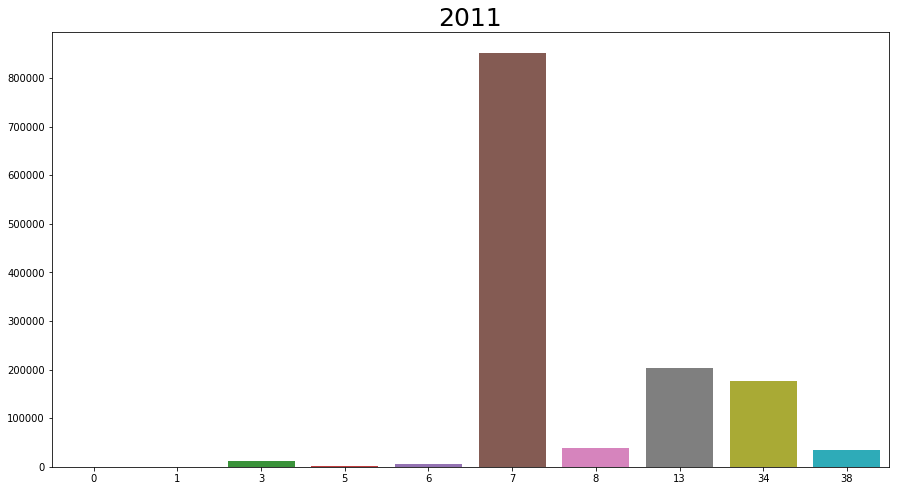

In [171]:
plt.figure(figsize=(15,8))
plt.title('2011', fontsize=25)
sns.barplot(data2011.Cashier.value_counts().index, data2011.Cashier.value_counts().values)
plt.show()

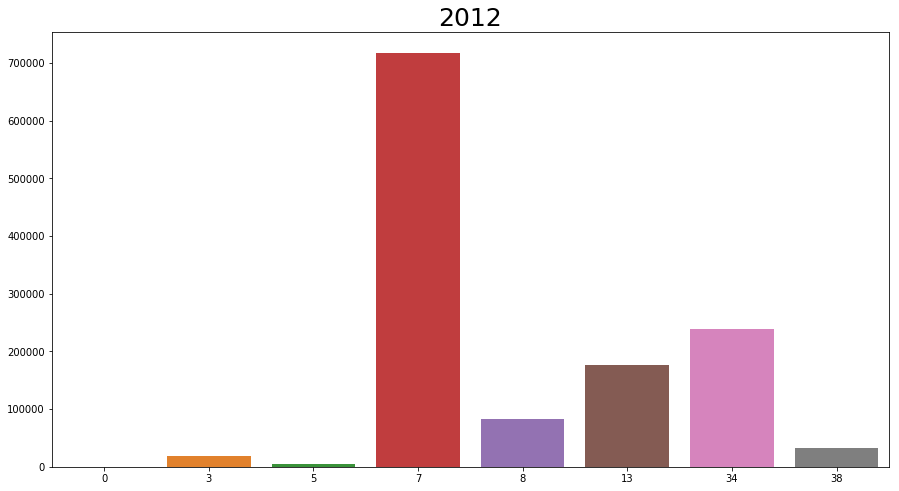

In [172]:
plt.figure(figsize=(15,8))
plt.title('2012', fontsize=25)
sns.barplot(data2012.Cashier.value_counts().index, data2012.Cashier.value_counts().values)
plt.show()


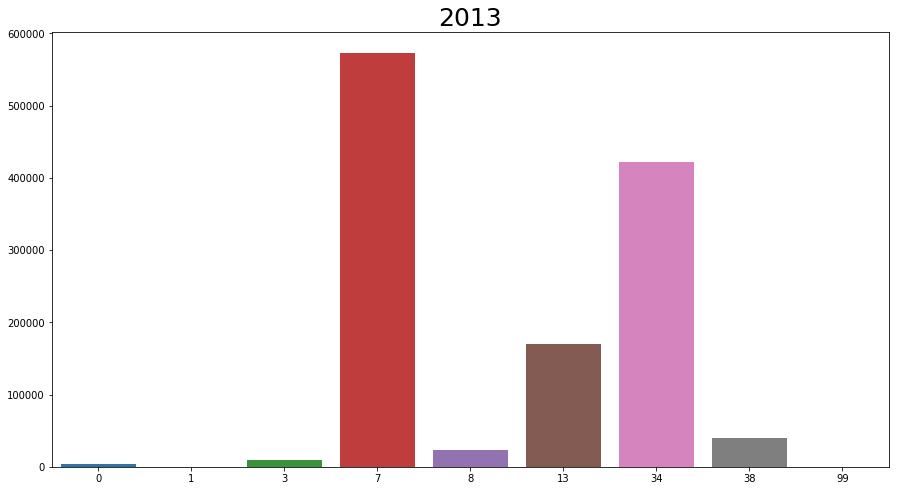

In [173]:
plt.figure(figsize=(15,8))
plt.title('2013', fontsize=25)
sns.barplot(data2013.Cashier.value_counts().index, data2013.Cashier.value_counts().values)
plt.show()


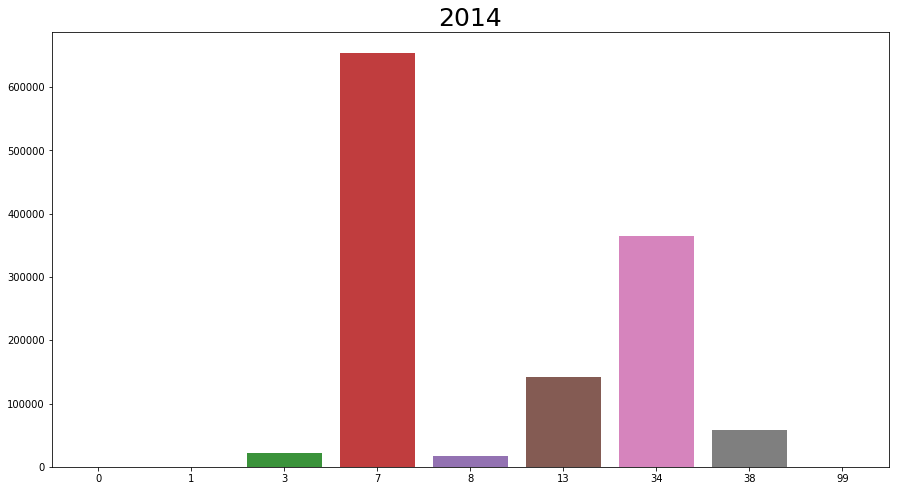

In [174]:
plt.figure(figsize=(15,8))
plt.title('2014', fontsize=25)
sns.barplot(data2014.Cashier.value_counts().index, data2014.Cashier.value_counts().values)
plt.show()


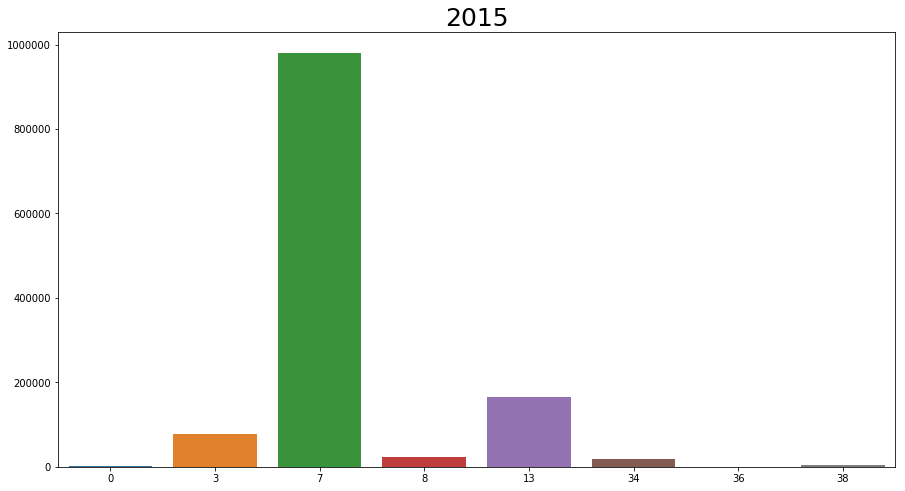

In [175]:
plt.figure(figsize=(15,8))
plt.title('2015', fontsize=25)
sns.barplot(data2015.Cashier.value_counts().index, data2015.Cashier.value_counts().values)
plt.show()


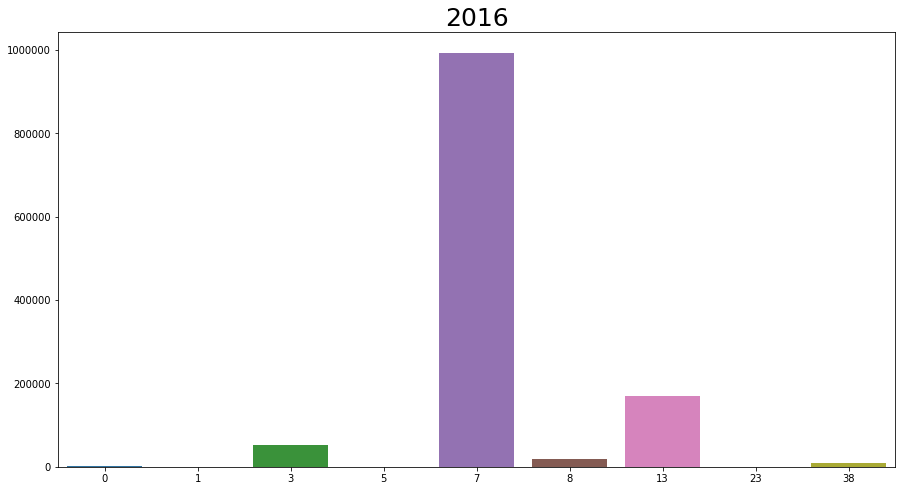

In [176]:
plt.figure(figsize=(15,8))
plt.title('2016', fontsize=25)
sns.barplot(data2016.Cashier.value_counts().index, data2016.Cashier.value_counts().values)
plt.show()


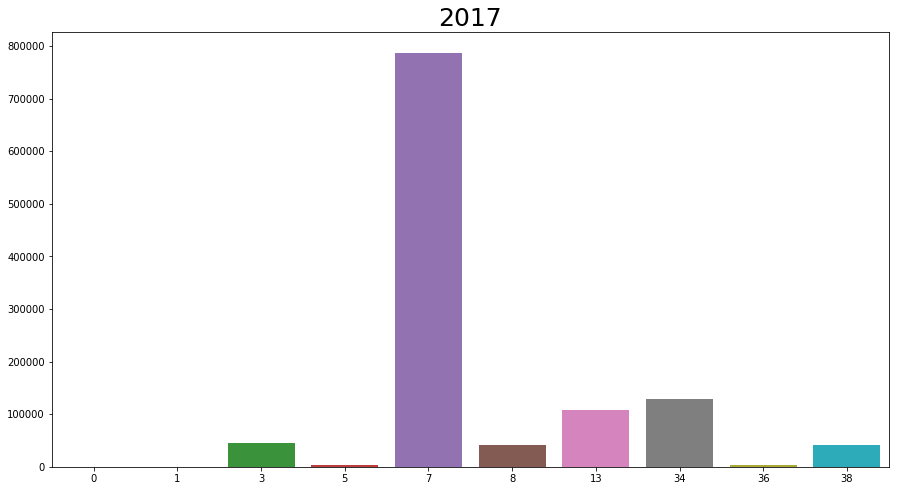

In [177]:
plt.figure(figsize=(15,8))
plt.title('2017', fontsize=25)
sns.barplot(data2017.Cashier.value_counts().index, data2017.Cashier.value_counts().values)
plt.show()


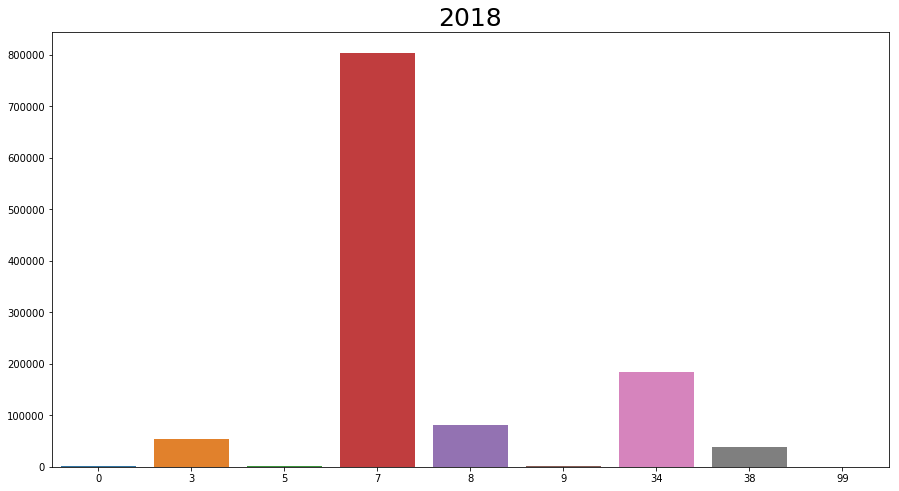

In [178]:
plt.figure(figsize=(15,8))
plt.title('2018', fontsize=25)
sns.barplot(data2018.Cashier.value_counts().index, data2018.Cashier.value_counts().values)
plt.show()


The cachier id is valid but we have some values are 0 so we will eliminate them.

In [5]:
data2011=data2011[data2011.Cashier!=0]
data2012=data2012[data2012.Cashier!=0]
data2013=data2013[data2013.Cashier!=0]
data2014=data2014[data2014.Cashier!=0]
data2015=data2015[data2015.Cashier!=0]
data2016=data2016[data2016.Cashier!=0]
data2017=data2017[data2017.Cashier!=0]
data2018=data2018[data2018.Cashier!=0]

## Payment Type

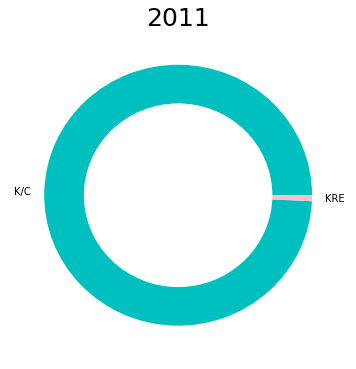

In [180]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.PaymentType.value_counts().values, labels=data2011.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


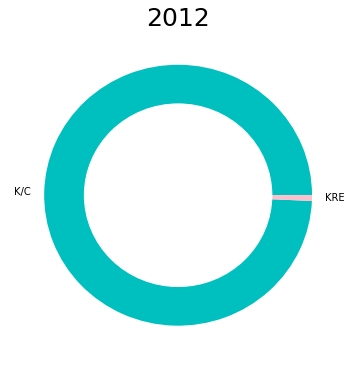

In [181]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.PaymentType.value_counts().values, labels=data2012.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


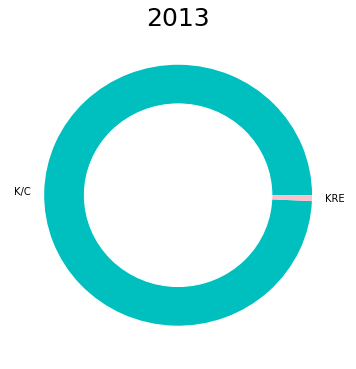

In [182]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.PaymentType.value_counts().values, labels=data2013.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


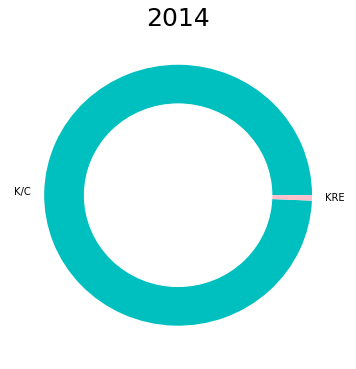

In [183]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.PaymentType.value_counts().values, labels=data2014.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


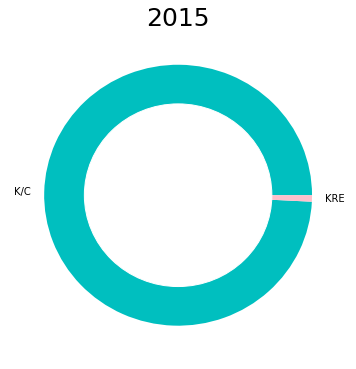

In [184]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.PaymentType.value_counts().values, labels=data2015.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


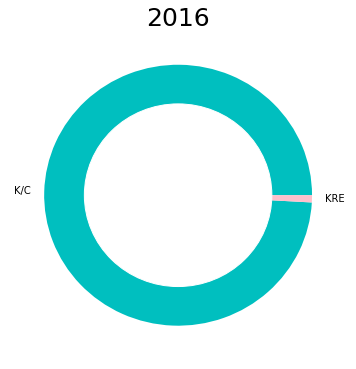

In [185]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.PaymentType.value_counts().values, labels=data2016.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


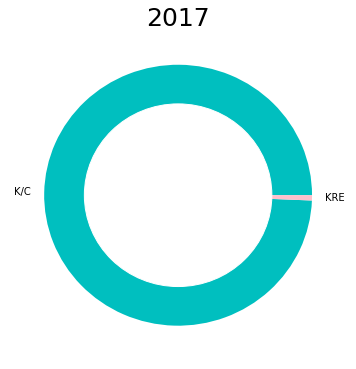

In [186]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.PaymentType.value_counts().values, labels=data2017.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


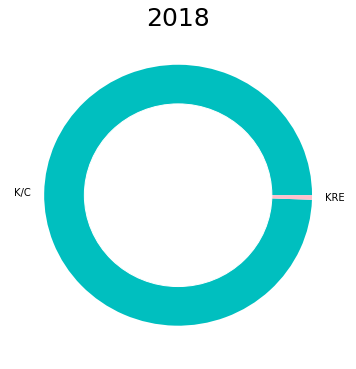

In [187]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.PaymentType.value_counts().values, labels=data2018.PaymentType.value_counts().index, colors=['c','pink'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


All the values of 'PaymentType' are correct

### Firm

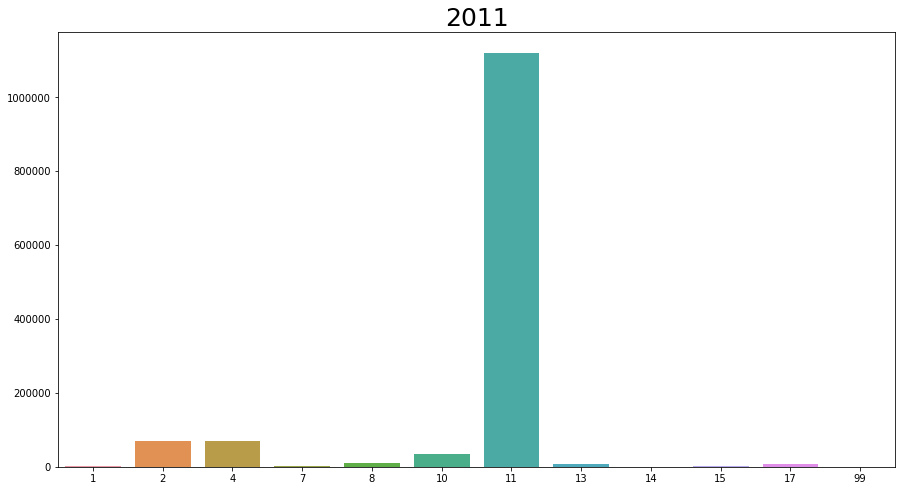

In [188]:
plt.figure(figsize=(15,8))
plt.title('2011', fontsize=25)
sns.barplot(data2011.Firm.value_counts().index, data2011.Firm.value_counts().values)
plt.show()

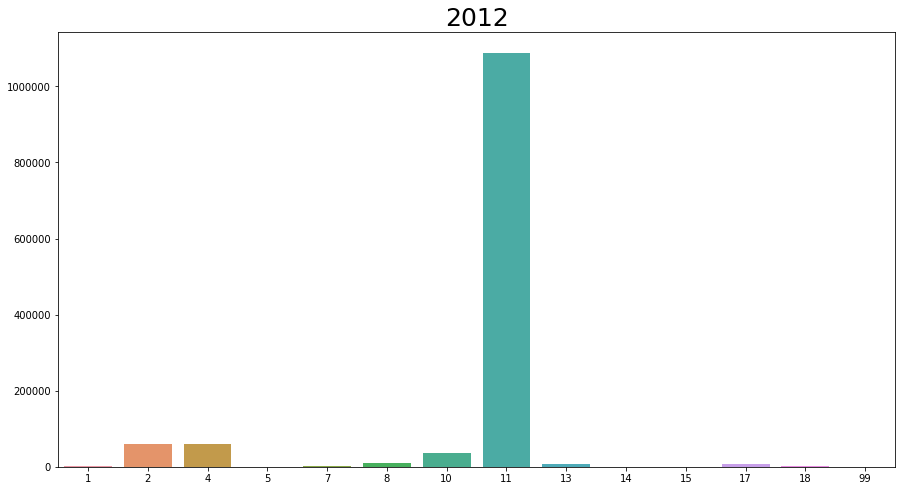

In [189]:
plt.figure(figsize=(15,8))
plt.title('2012', fontsize=25)
sns.barplot(data2012.Firm.value_counts().index, data2012.Firm.value_counts().values)
plt.show()

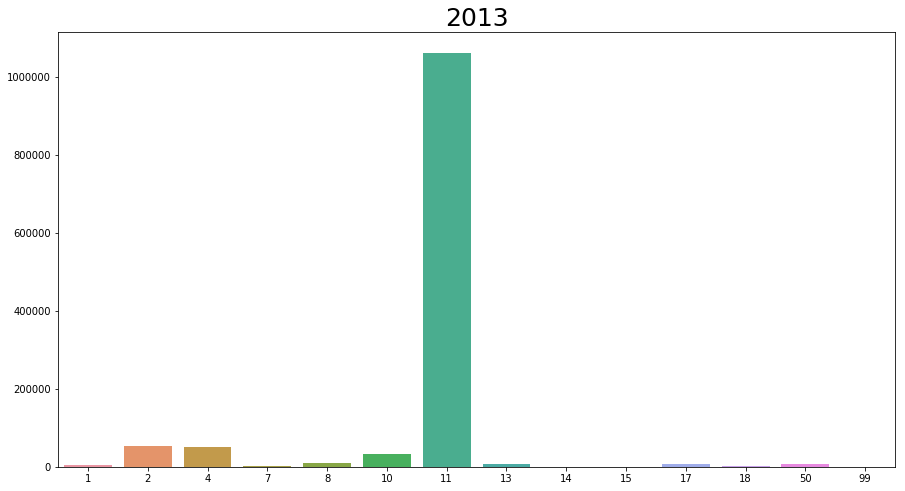

In [190]:
plt.figure(figsize=(15,8))
plt.title('2013', fontsize=25)
sns.barplot(data2013.Firm.value_counts().index, data2013.Firm.value_counts().values)
plt.show()

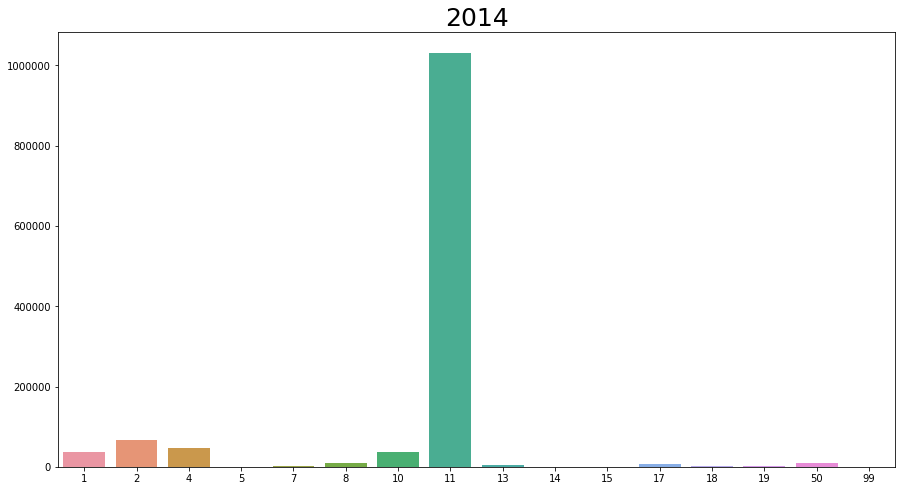

In [191]:
plt.figure(figsize=(15,8))
plt.title('2014', fontsize=25)
sns.barplot(data2014.Firm.value_counts().index, data2014.Firm.value_counts().values)
plt.show()

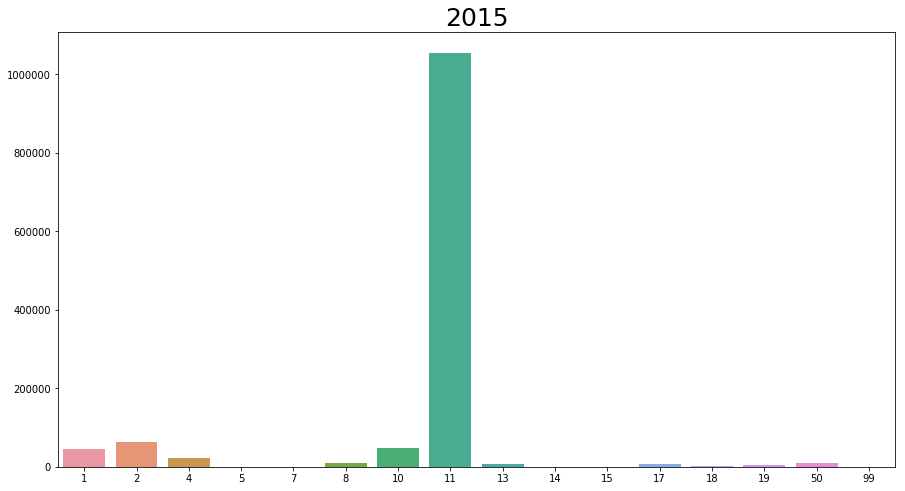

In [192]:
plt.figure(figsize=(15,8))
plt.title('2015', fontsize=25)
sns.barplot(data2015.Firm.value_counts().index, data2015.Firm.value_counts().values)
plt.show()

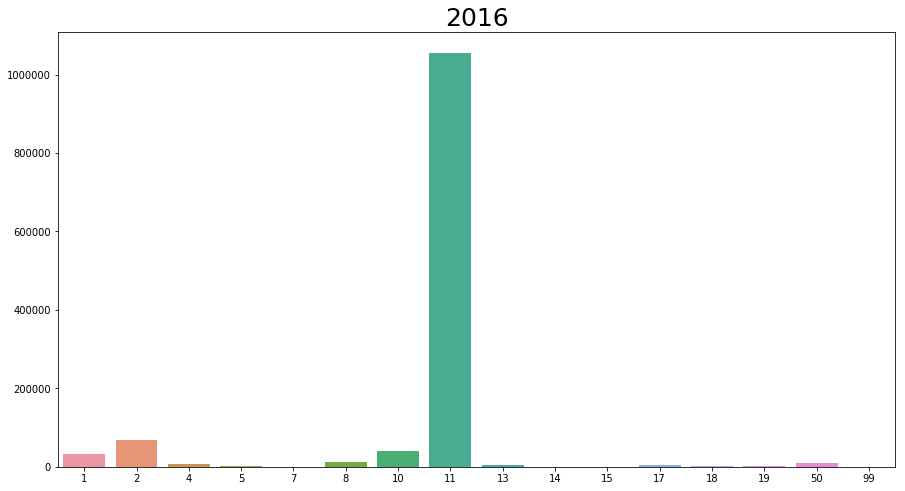

In [193]:
plt.figure(figsize=(15,8))
plt.title('2016', fontsize=25)
sns.barplot(data2016.Firm.value_counts().index, data2016.Firm.value_counts().values)
plt.show()

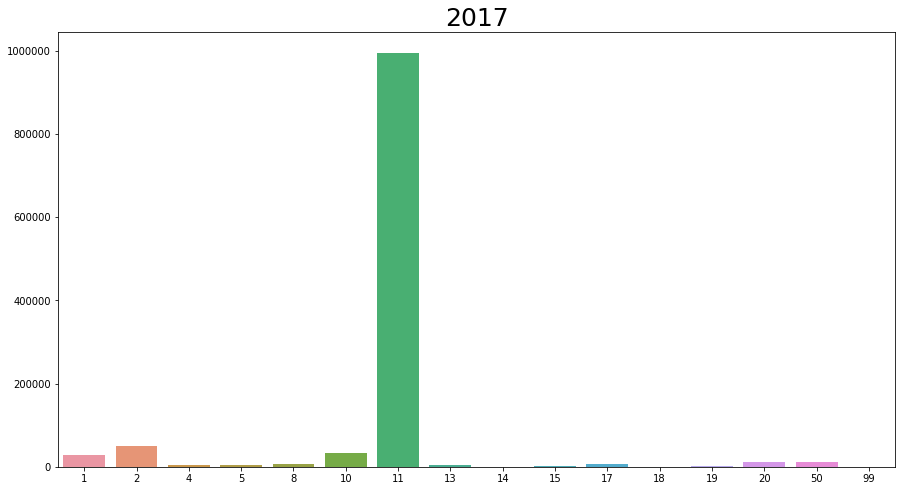

In [194]:
plt.figure(figsize=(15,8))
plt.title('2017', fontsize=25)
sns.barplot(data2017.Firm.value_counts().index, data2017.Firm.value_counts().values)
plt.show()

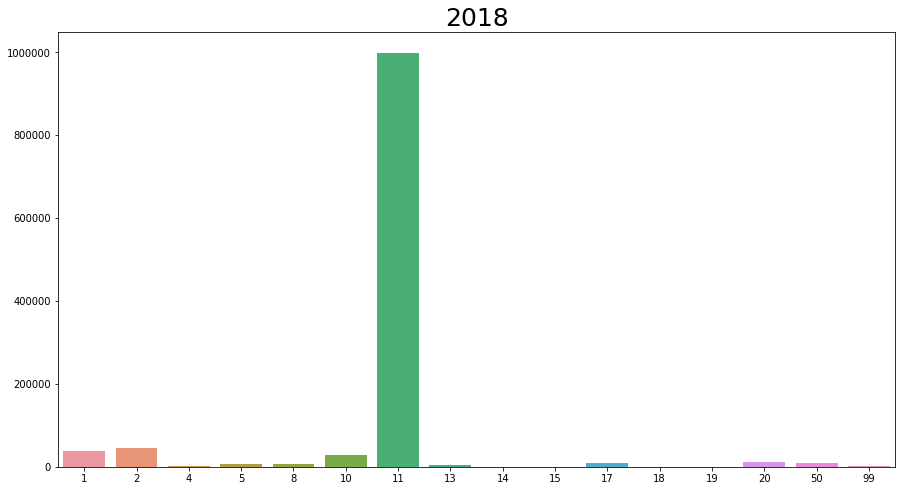

In [195]:
plt.figure(figsize=(15,8))
plt.title('2018', fontsize=25)
sns.barplot(data2018.Firm.value_counts().index, data2018.Firm.value_counts().values)
plt.show()

All the values are correct

## Department

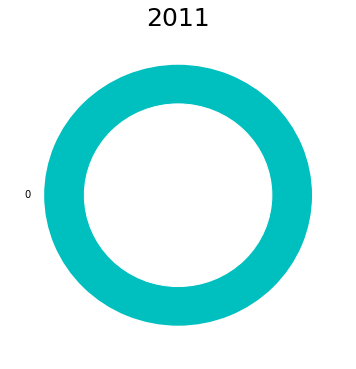

In [196]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.Department.value_counts().values, labels=data2011.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


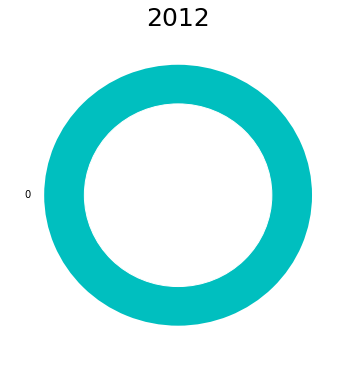

In [197]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.Department.value_counts().values, labels=data2012.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


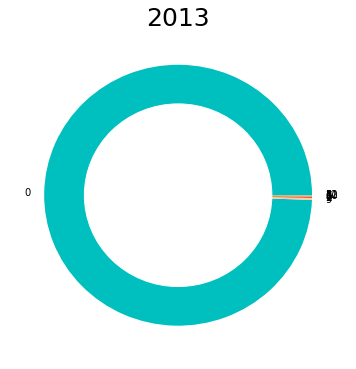

In [198]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.Department.value_counts().values, labels=data2013.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


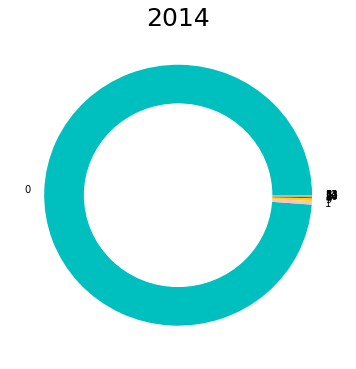

In [199]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.Department.value_counts().values, labels=data2014.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


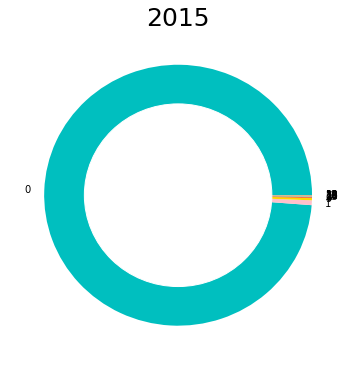

In [200]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.Department.value_counts().values, labels=data2015.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


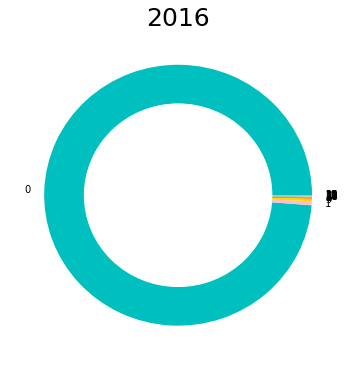

In [201]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.Department.value_counts().values, labels=data2016.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


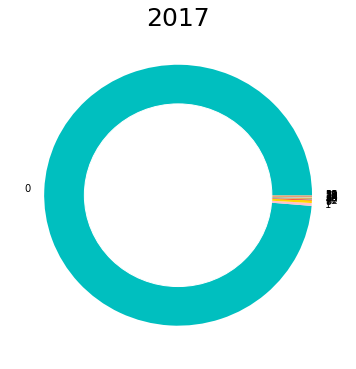

In [202]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.Department.value_counts().values, labels=data2017.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


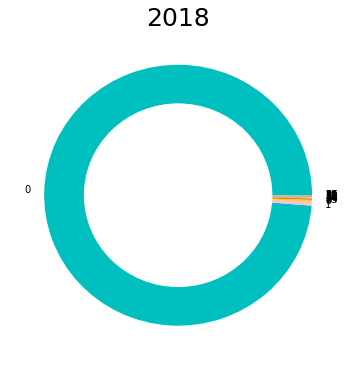

In [203]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.Department.value_counts().values, labels=data2018.Department.value_counts().index, colors=['c','pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In the majority of the case the department equals zero and since it's not important we will ignore it.

In [204]:
#Run this only once 
data2011.drop(['Department'], axis = 1,inplace=True)
data2012.drop(['Department'], axis = 1,inplace=True)
data2013.drop(['Department'], axis = 1,inplace=True)
data2014.drop(['Department'], axis = 1,inplace=True)
data2015.drop(['Department'], axis = 1,inplace=True)
data2016.drop(['Department'], axis = 1,inplace=True)
data2017.drop(['Department'], axis = 1,inplace=True)
data2018.drop(['Department'], axis = 1,inplace=True)

## Price List

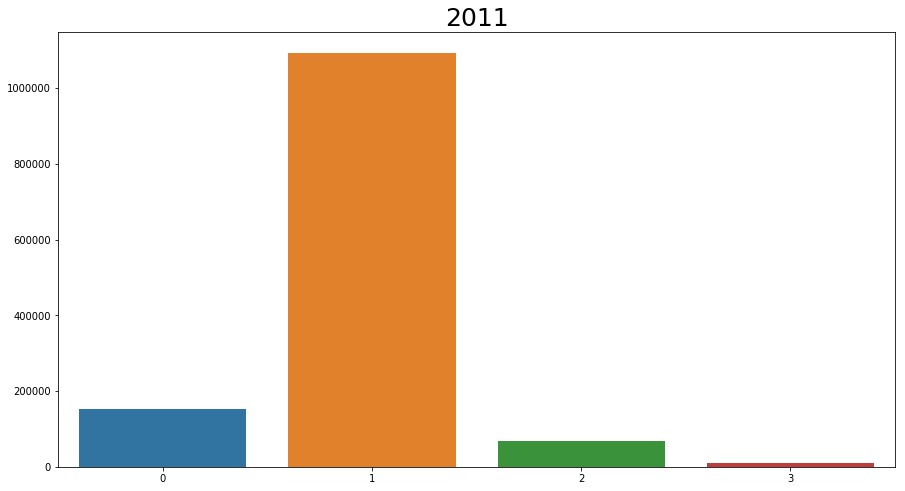

In [205]:
plt.figure(figsize=(15,8))
plt.title('2011', fontsize=25)
sns.barplot(data2011.PriceList.value_counts().index, data2011.PriceList.value_counts().values)
plt.show()

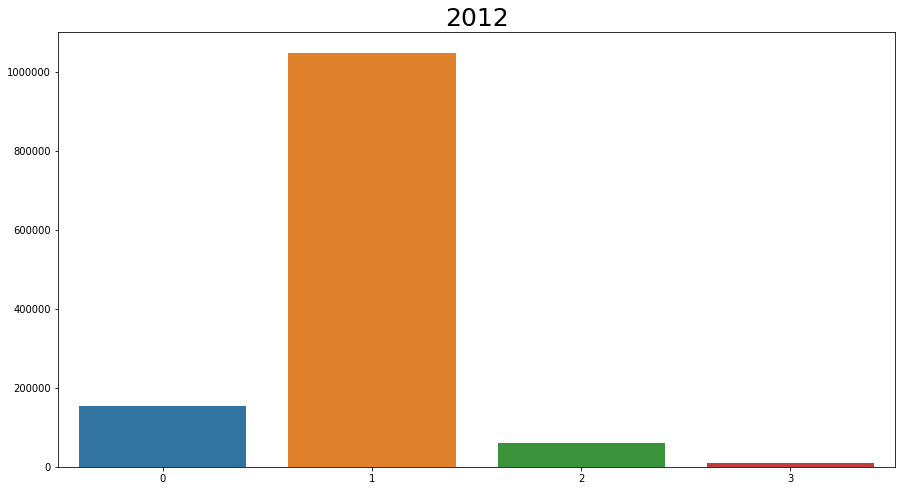

In [206]:
plt.figure(figsize=(15,8))
plt.title('2012', fontsize=25)
sns.barplot(data2012.PriceList.value_counts().index, data2012.PriceList.value_counts().values)
plt.show()

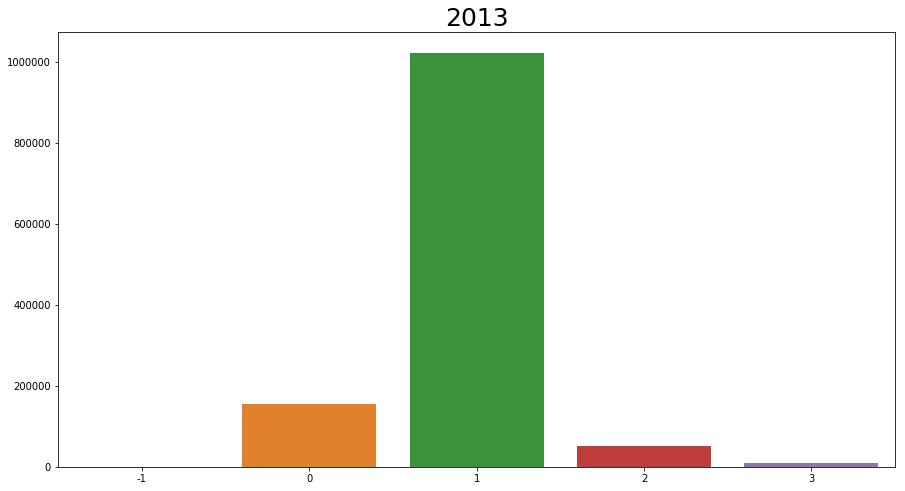

In [207]:
plt.figure(figsize=(15,8))
plt.title('2013', fontsize=25)
sns.barplot(data2013.PriceList.value_counts().index, data2013.PriceList.value_counts().values)
plt.show()

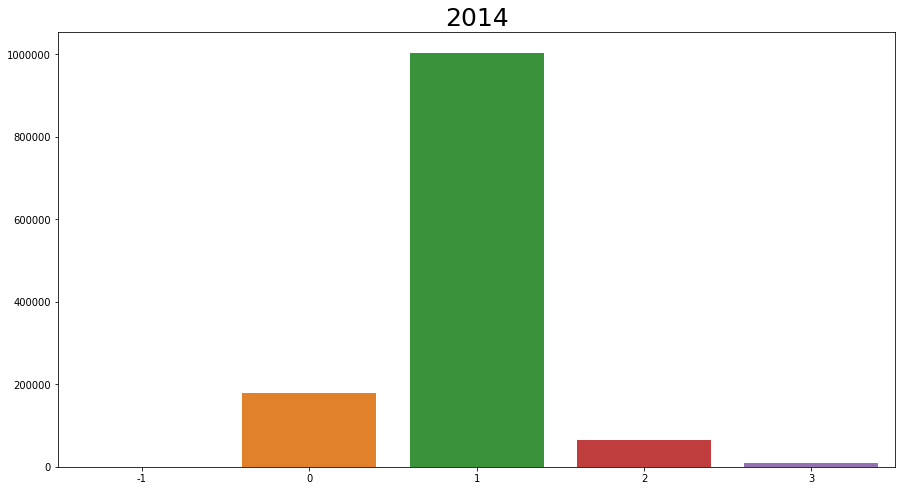

In [208]:
plt.figure(figsize=(15,8))
plt.title('2014', fontsize=25)
sns.barplot(data2014.PriceList.value_counts().index, data2014.PriceList.value_counts().values)
plt.show()

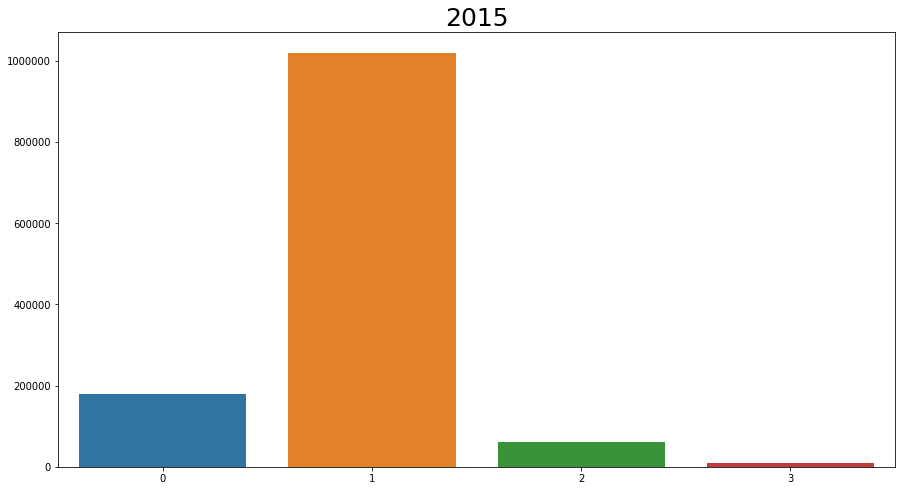

In [209]:
plt.figure(figsize=(15,8))
plt.title('2015', fontsize=25)
sns.barplot(data2015.PriceList.value_counts().index, data2015.PriceList.value_counts().values)
plt.show()

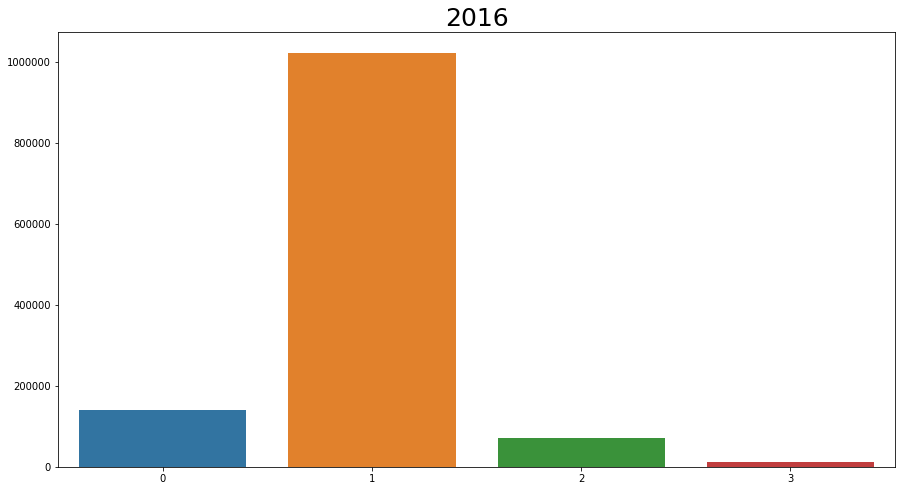

In [210]:
plt.figure(figsize=(15,8))
plt.title('2016', fontsize=25)
sns.barplot(data2016.PriceList.value_counts().index, data2016.PriceList.value_counts().values)
plt.show()

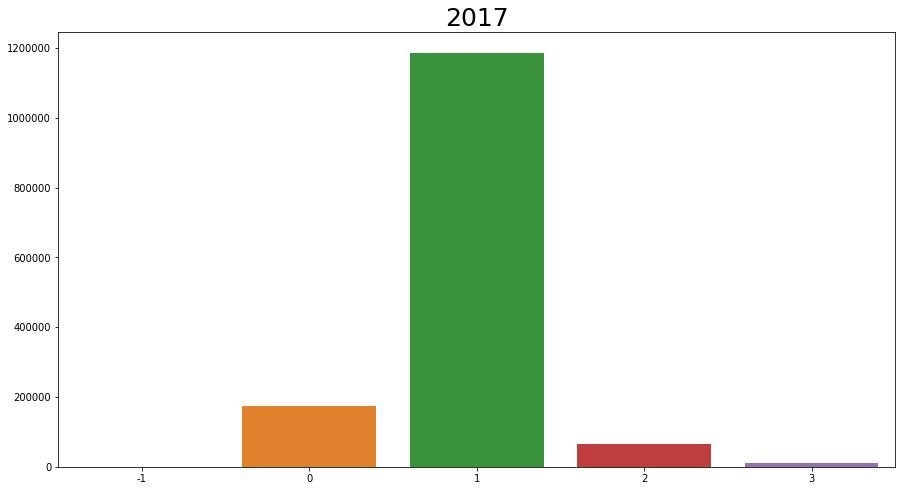

In [12]:
plt.figure(figsize=(15,8))
plt.title('2017', fontsize=25)
sns.barplot(data2017.PriceList.value_counts().index, data2017.PriceList.value_counts().values)
plt.show()

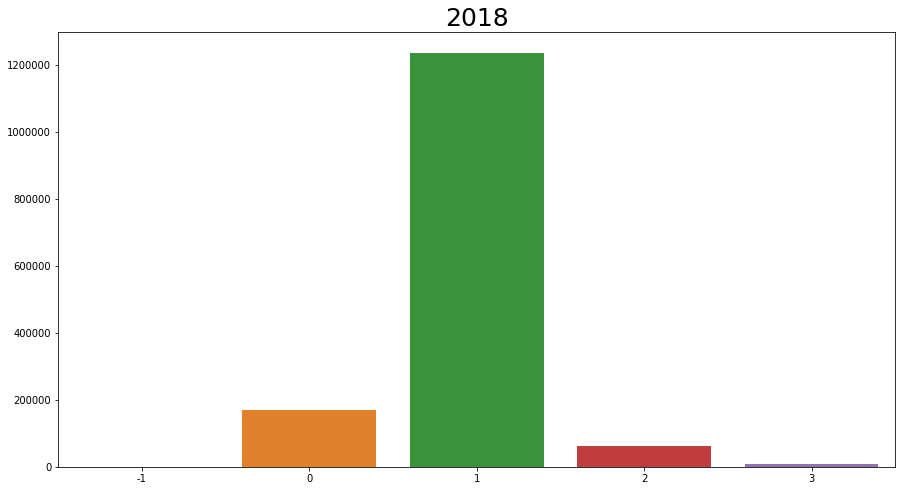

In [13]:
plt.figure(figsize=(15,8))
plt.title('2018', fontsize=25)
sns.barplot(data2018.PriceList.value_counts().index, data2018.PriceList.value_counts().values)
plt.show()

For 2013 and 2014 we have a negative value of the priceList so we will delete them

In [215]:
data2013=data2013[data2013.PriceList!=-1]
data2014=data2014[data2014.PriceList!=-1]

## Subvention Level

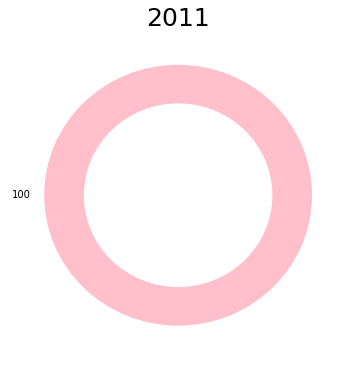

In [216]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.SubventionLevel.value_counts().values, labels=data2011.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


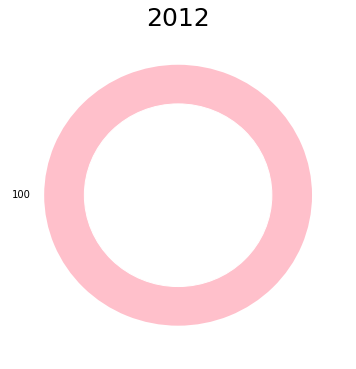

In [217]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.SubventionLevel.value_counts().values, labels=data2012.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


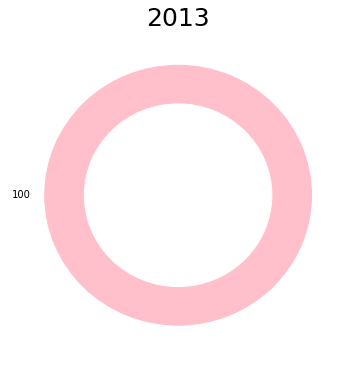

In [218]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.SubventionLevel.value_counts().values, labels=data2013.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


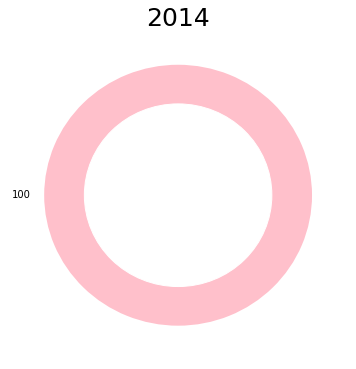

In [219]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.SubventionLevel.value_counts().values, labels=data2014.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


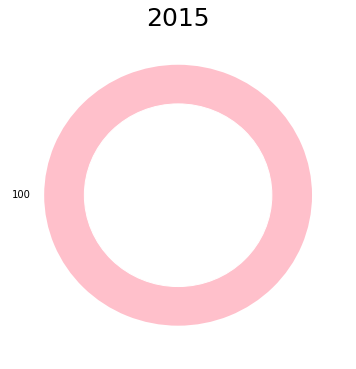

In [220]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.SubventionLevel.value_counts().values, labels=data2015.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


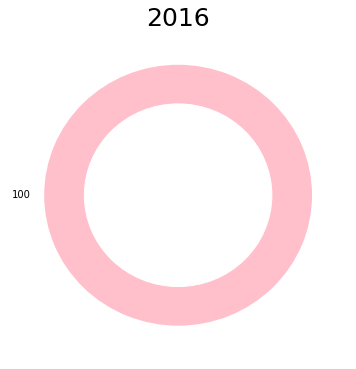

In [221]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.SubventionLevel.value_counts().values, labels=data2016.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


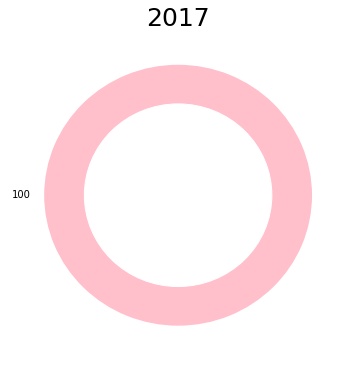

In [222]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.SubventionLevel.value_counts().values, labels=data2017.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


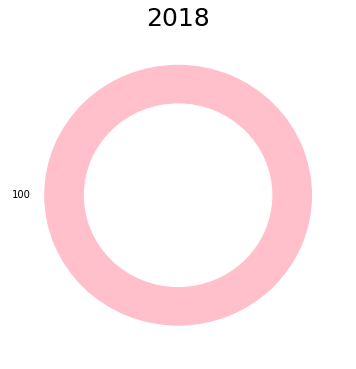

In [223]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.SubventionLevel.value_counts().values, labels=data2018.SubventionLevel.value_counts().index, colors=['pink','gold','r','darkgray','darkorange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


All the subvention are at 100% so will ignore it

In [224]:
#Run this only once 
data2011.drop(['SubventionLevel'], axis = 1,inplace=True)
data2012.drop(['SubventionLevel'], axis = 1,inplace=True)
data2013.drop(['SubventionLevel'], axis = 1,inplace=True)
data2014.drop(['SubventionLevel'], axis = 1,inplace=True)
data2015.drop(['SubventionLevel'], axis = 1,inplace=True)
data2016.drop(['SubventionLevel'], axis = 1,inplace=True)
data2017.drop(['SubventionLevel'], axis = 1,inplace=True)
data2018.drop(['SubventionLevel'], axis = 1,inplace=True)

## Position Type

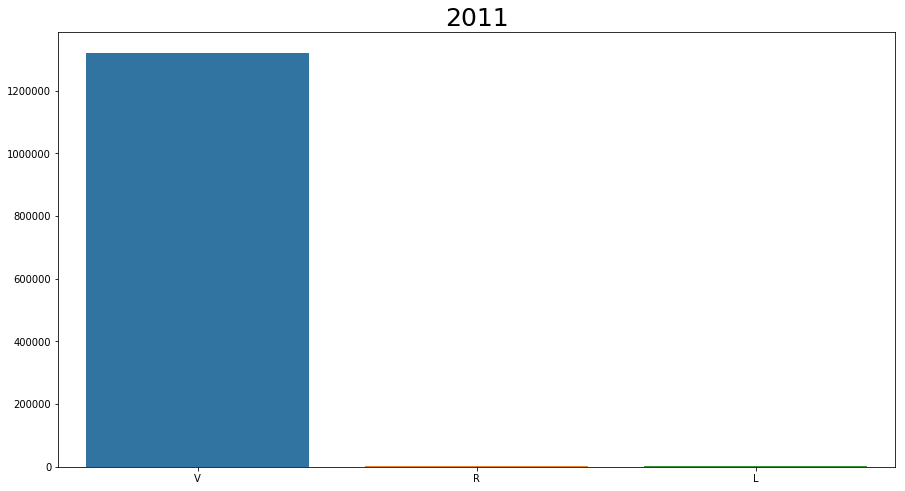

In [225]:
plt.figure(figsize=(15,8))
plt.title('2011', fontsize=25)
sns.barplot(data2011.PositionType.value_counts().index, data2011.PositionType.value_counts().values)
plt.show()

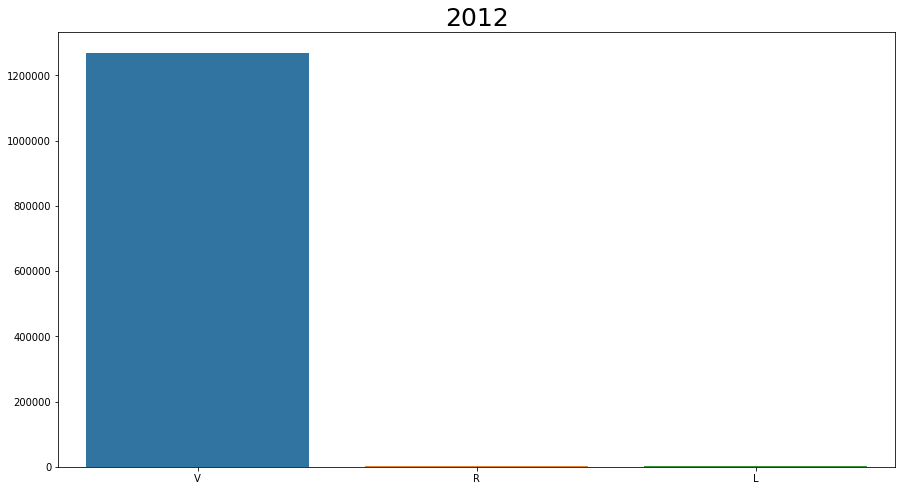

In [226]:
plt.figure(figsize=(15,8))
plt.title('2012', fontsize=25)
sns.barplot(data2012.PositionType.value_counts().index, data2012.PositionType.value_counts().values)
plt.show()

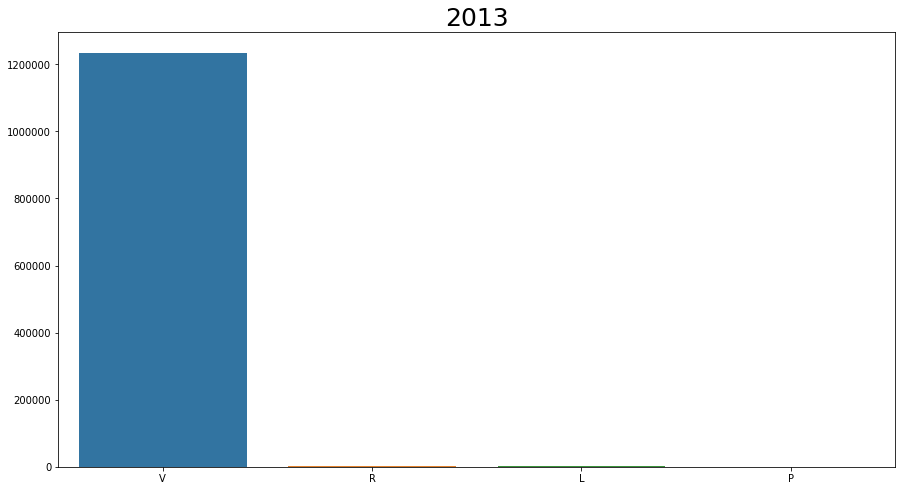

In [227]:
plt.figure(figsize=(15,8))
plt.title('2013', fontsize=25)
sns.barplot(data2013.PositionType.value_counts().index, data2013.PositionType.value_counts().values)
plt.show()

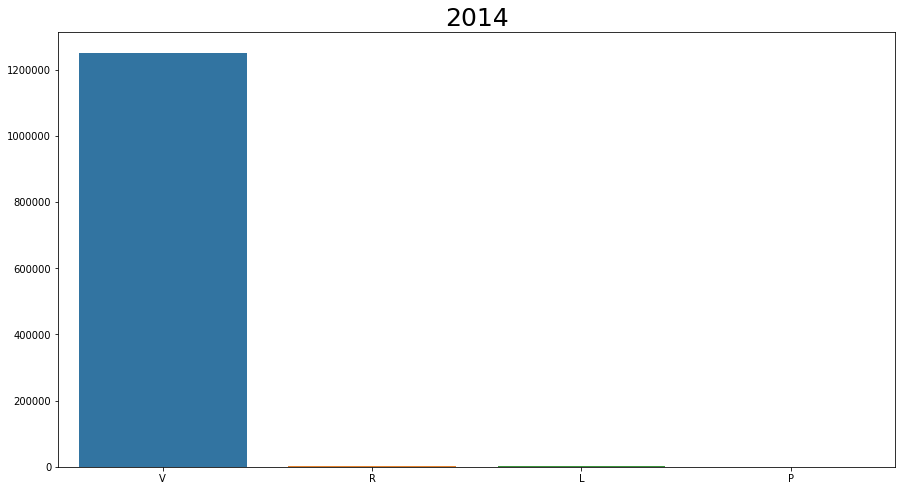

In [228]:
plt.figure(figsize=(15,8))
plt.title('2014', fontsize=25)
sns.barplot(data2014.PositionType.value_counts().index, data2014.PositionType.value_counts().values)
plt.show()

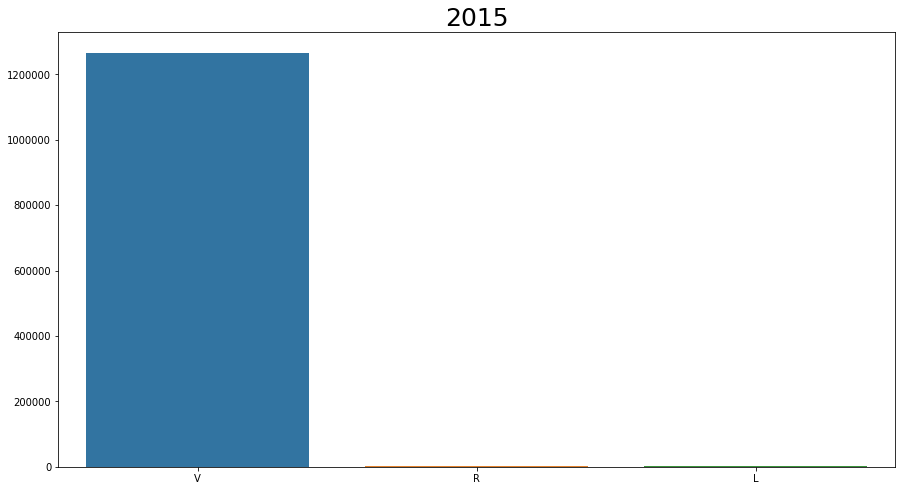

In [229]:
plt.figure(figsize=(15,8))
plt.title('2015', fontsize=25)
sns.barplot(data2015.PositionType.value_counts().index, data2015.PositionType.value_counts().values)
plt.show()

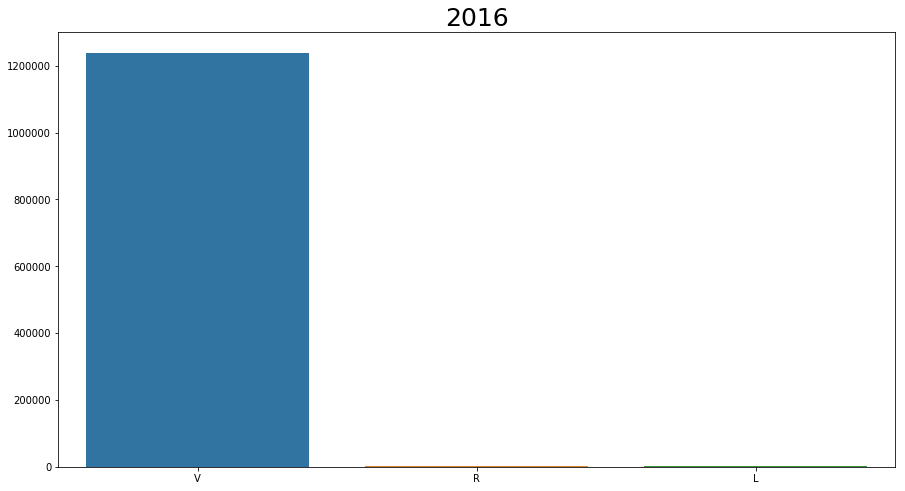

In [230]:
plt.figure(figsize=(15,8))
plt.title('2016', fontsize=25)
sns.barplot(data2016.PositionType.value_counts().index, data2016.PositionType.value_counts().values)
plt.show()

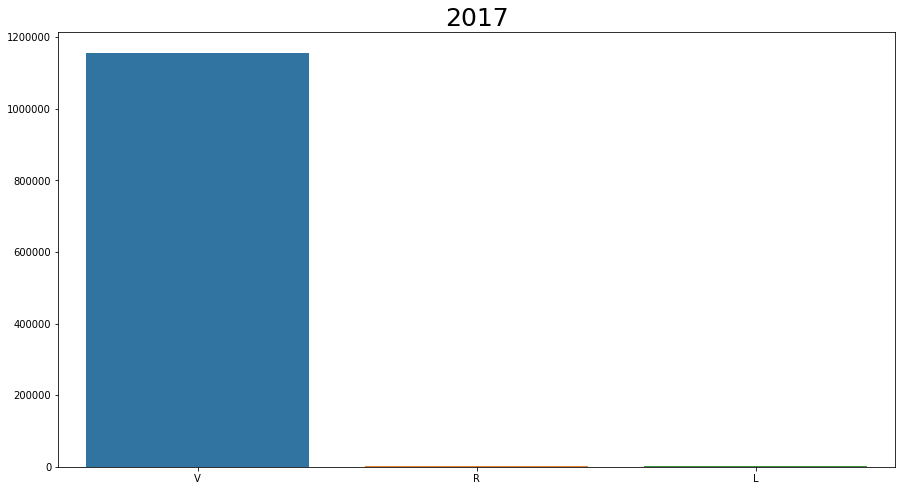

In [231]:
plt.figure(figsize=(15,8))
plt.title('2017', fontsize=25)
sns.barplot(data2017.PositionType.value_counts().index, data2017.PositionType.value_counts().values)
plt.show()

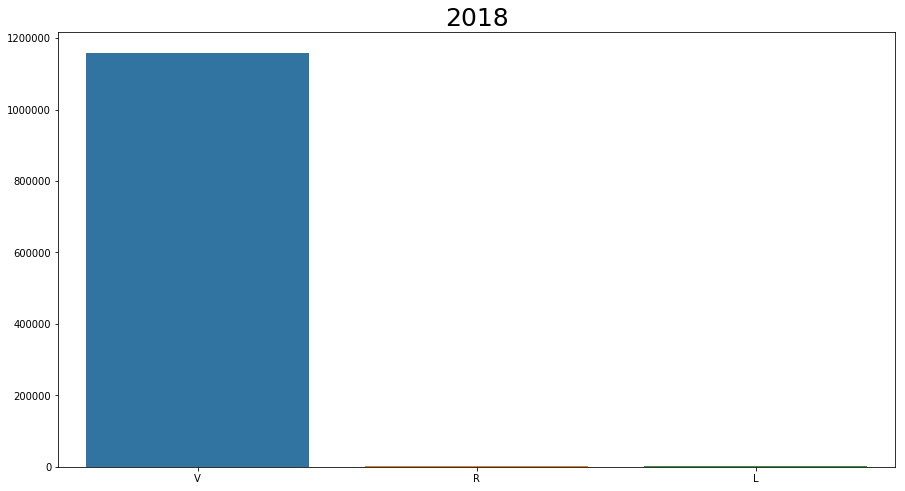

In [232]:
plt.figure(figsize=(15,8))
plt.title('2018', fontsize=25)
sns.barplot(data2018.PositionType.value_counts().index, data2018.PositionType.value_counts().values)
plt.show()

We have 4 types of the position type 'V','R','L' and 'P'. And all the values are correct.

## Item Number

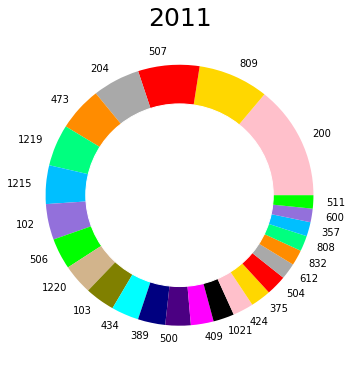

In [233]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.ItemNumber.value_counts().values[:25], labels=data2011.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

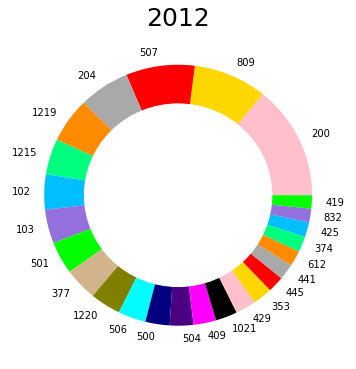

In [234]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.ItemNumber.value_counts().values[:25], labels=data2012.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


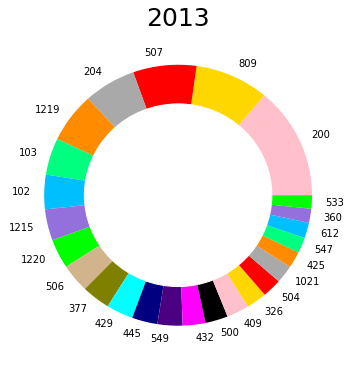

In [235]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.ItemNumber.value_counts().values[:25], labels=data2013.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


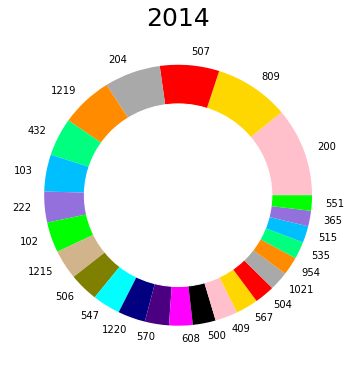

In [236]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.ItemNumber.value_counts().values[:25], labels=data2014.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


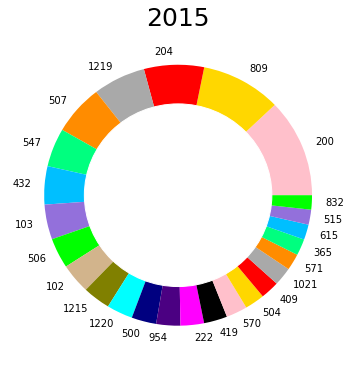

In [237]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.ItemNumber.value_counts().values[:25], labels=data2015.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


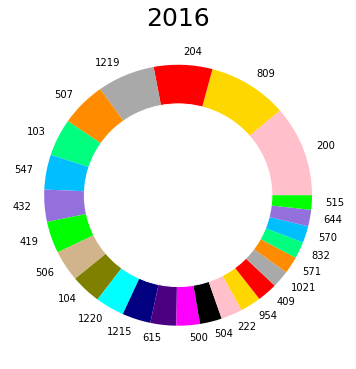

In [238]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.ItemNumber.value_counts().values[:25], labels=data2016.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


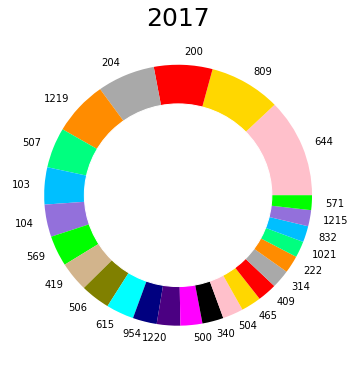

In [239]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.ItemNumber.value_counts().values[:25], labels=data2017.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


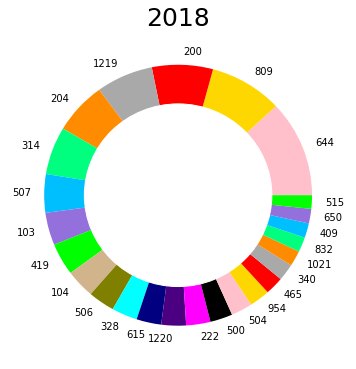

In [240]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.ItemNumber.value_counts().values[:25], labels=data2018.ItemNumber.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


The ItemNumber is the id of each product and all the values are correct

## Taxes

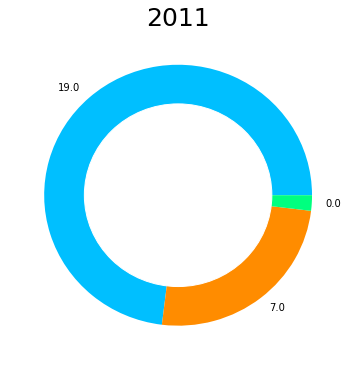

In [241]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.Taxes.value_counts().values, labels=data2011.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


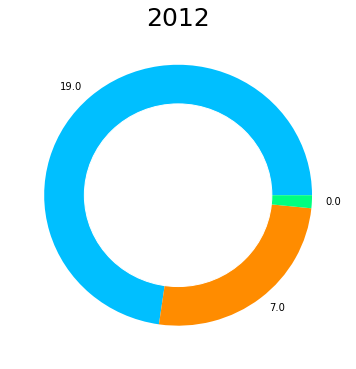

In [242]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.Taxes.value_counts().values, labels=data2012.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


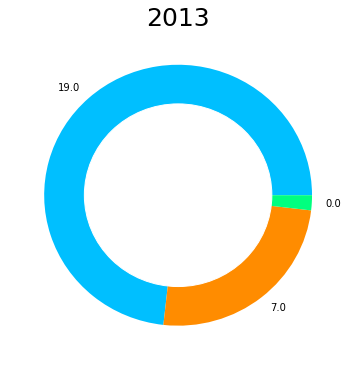

In [243]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.Taxes.value_counts().values, labels=data2013.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


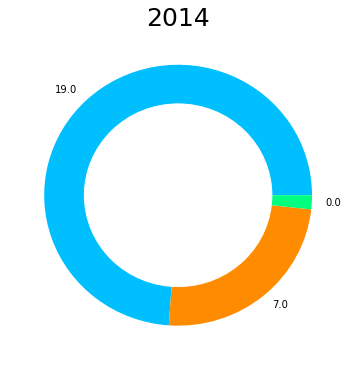

In [244]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.Taxes.value_counts().values, labels=data2014.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


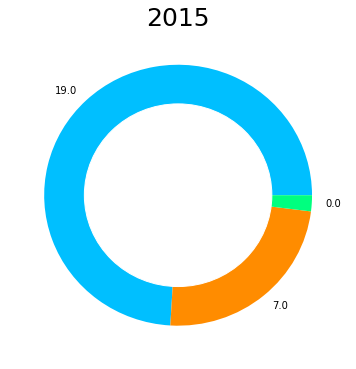

In [245]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.Taxes.value_counts().values, labels=data2015.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


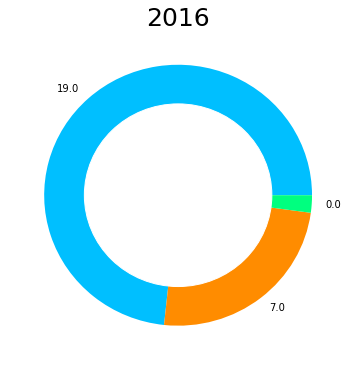

In [246]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.Taxes.value_counts().values, labels=data2016.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


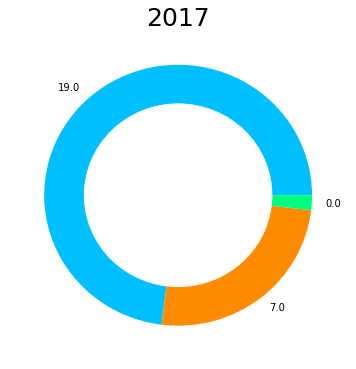

In [247]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.Taxes.value_counts().values, labels=data2017.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


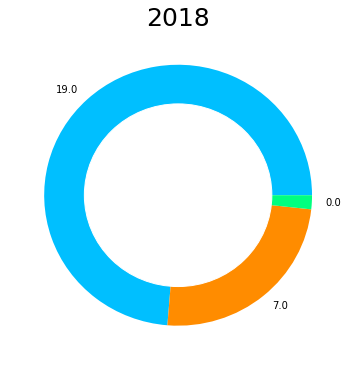

In [248]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.Taxes.value_counts().values, labels=data2018.Taxes.value_counts().index, 
colors=['deepskyblue','darkorange','springgreen','navy', 'indigo','pink','gold','r','darkgray','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


We have 3 type of taxes 19% , 7% or tax free.

## Amount

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



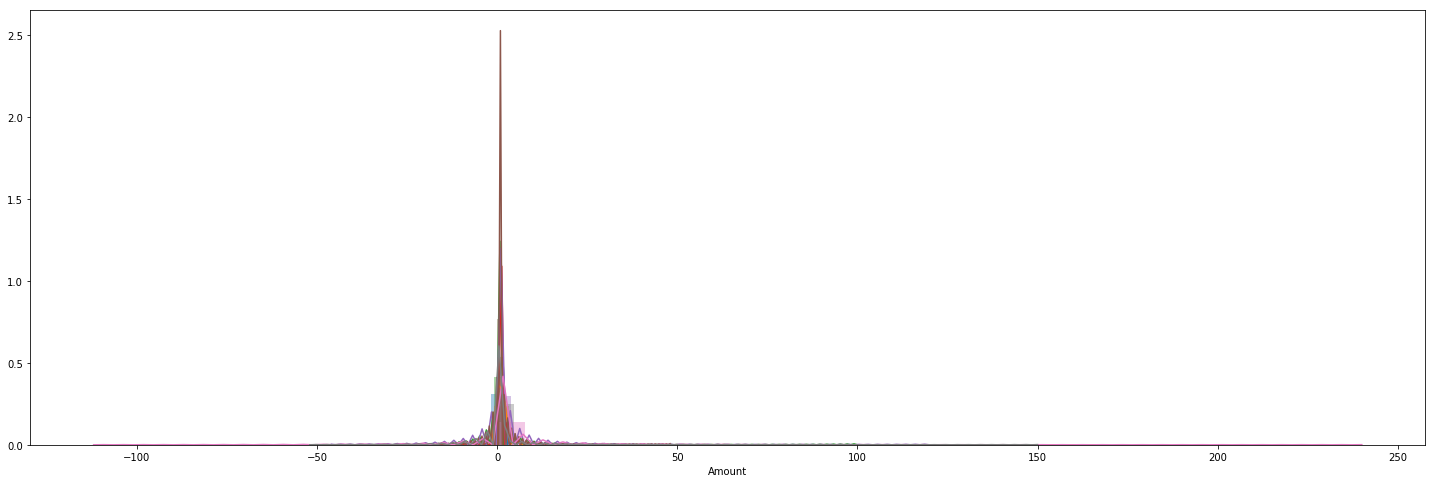

In [97]:
plt.figure(figsize=(25, 8))
sns.distplot(data2011['Amount'])
sns.distplot(data2012['Amount'])
sns.distplot(data2013['Amount'])
sns.distplot(data2014['Amount'])
sns.distplot(data2015['Amount'])
sns.distplot(data2016['Amount'])
sns.distplot(data2017['Amount'])
sns.distplot(data2018['Amount'])

In [98]:
data_mean = np.mean(data2018['Amount'])
data_median = np.median(data2018['Amount'])
data_sd = np.std(data2018['Amount'])

print("Mean:{}\nMedian:{}\nStandard Deviation:{}".format(data_mean, data_median, data_sd))



Mean:0.9959062898603541
Median:1.0
Standard Deviation:0.31645895801996005


Using the distribution of the amount we can see that the amount around 1 with some outliers which we have to get rid of them  

In [250]:
data2011= data2011[(data2011.Amount>0) & (data2011.Amount<15)]
data2012= data2012[(data2012.Amount>0) & (data2012.Amount<15)]
data2013= data2013[(data2013.Amount>0) & (data2013.Amount<15)]
data2014= data2014[(data2014.Amount>0) & (data2014.Amount<15)]
data2015= data2015[(data2015.Amount>0) & (data2015.Amount<15)]
data2016= data2016[(data2016.Amount>0) & (data2016.Amount<15)]
data2017= data2017[(data2017.Amount>0) & (data2017.Amount<15)]
data2018= data2018[(data2018.Amount>0) & (data2018.Amount<15)]

## Revenue

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



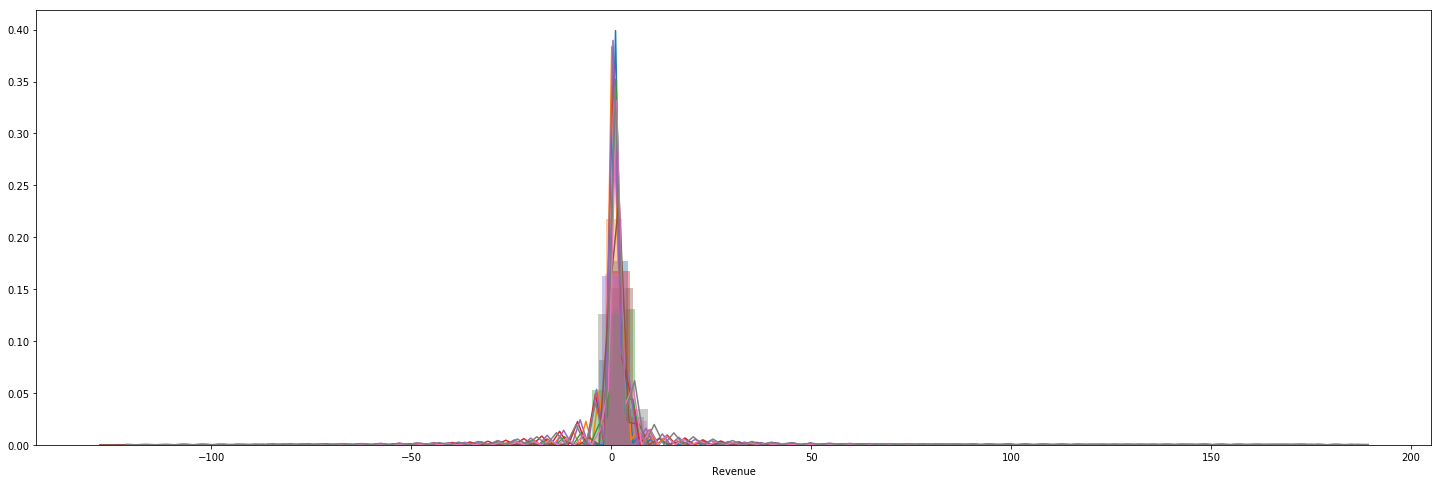

In [251]:
plt.figure(figsize=(25, 8))
sns.distplot(data2011['Revenue'])
sns.distplot(data2012['Revenue'])
sns.distplot(data2013['Revenue'])
sns.distplot(data2014['Revenue'])
sns.distplot(data2015['Revenue'])
sns.distplot(data2016['Revenue'])
sns.distplot(data2017['Revenue'])
sns.distplot(data2018['Revenue'])

In [60]:
data2016 = pd.read_table('./Dataz/Data2016.txt',sep=';',decimal=',', quotechar='"',encoding='latin-1',low_memory=True);

C:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



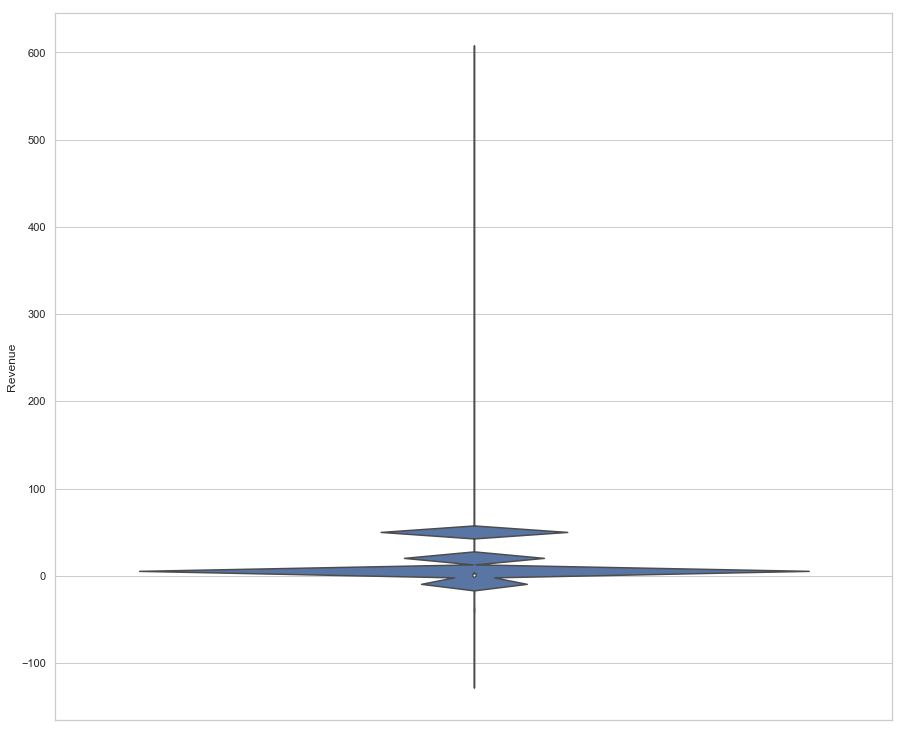

In [70]:
plt.figure(figsize=(15, 13))
sns.set(style="whitegrid")
ax = sns.violinplot(y=data2016['Revenue'])

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



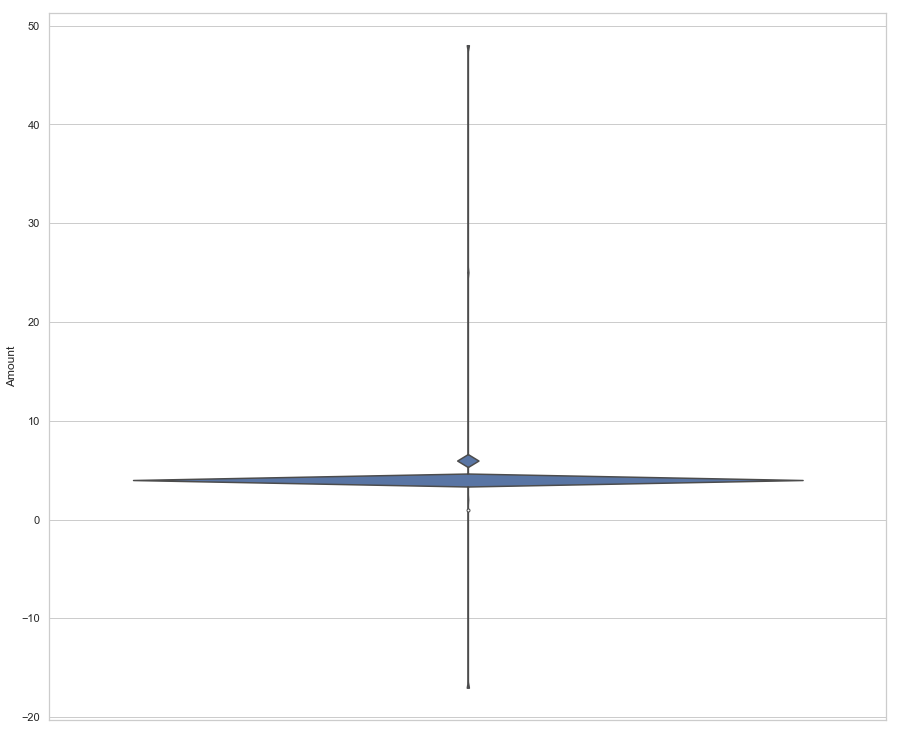

In [74]:
plt.figure(figsize=(15, 13))
sns.set(style="whitegrid")
ax = sns.violinplot(y=data2016['Amount'])

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



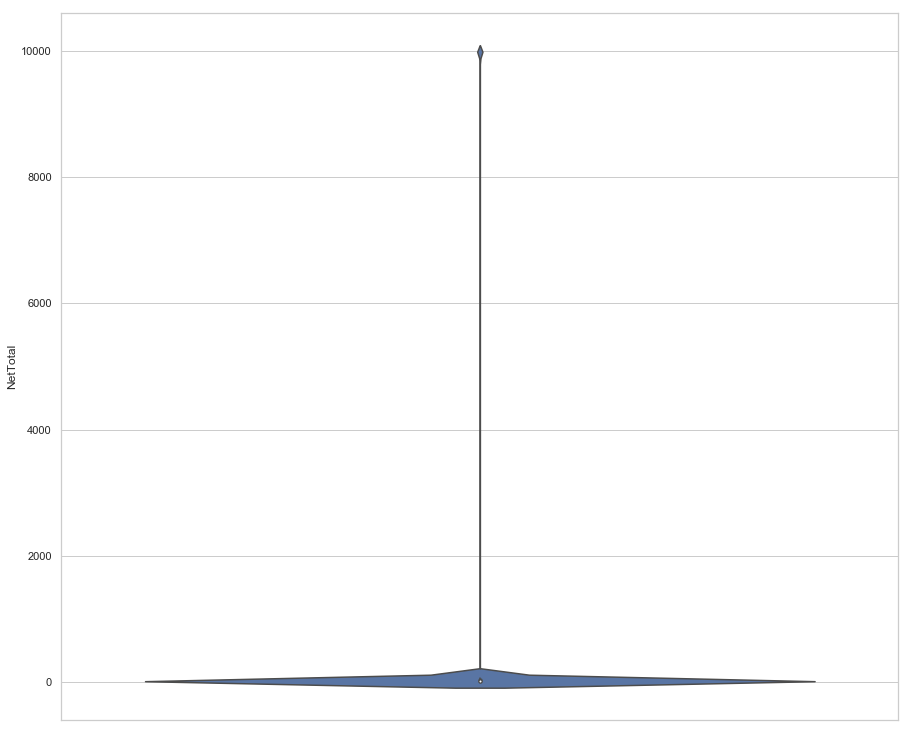

In [72]:
plt.figure(figsize=(15, 13))
sns.set(style="whitegrid")
ax = sns.violinplot(y=data2016['NetTotal'])

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



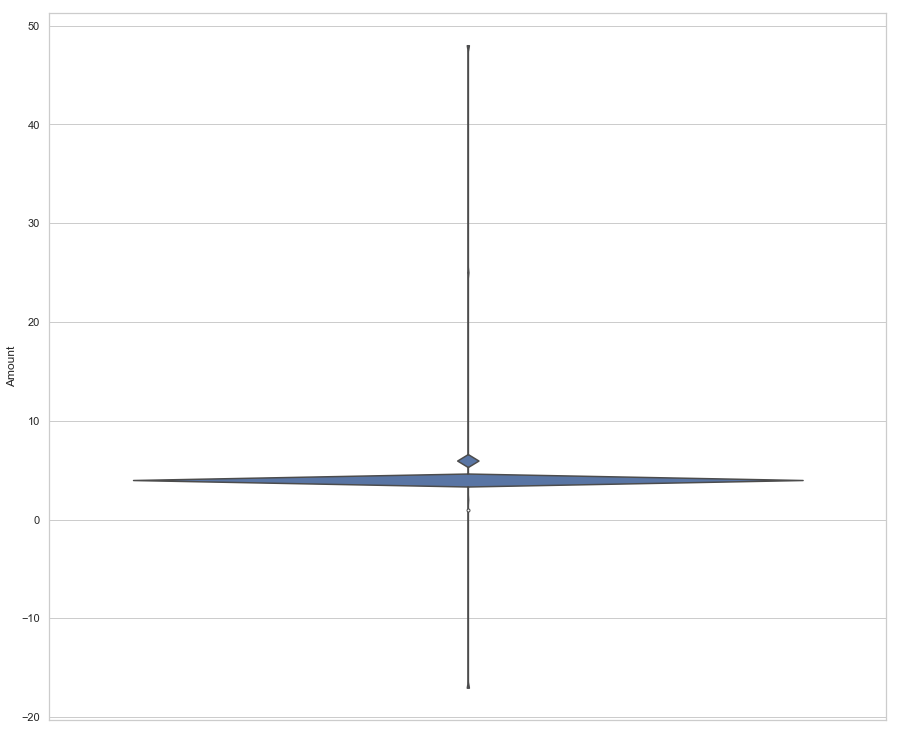

In [71]:
plt.figure(figsize=(15, 13))
sns.set(style="whitegrid")
ax = sns.violinplot(y=data2016['Amount'])

In [102]:
data_mean = np.mean(data2012['Revenue'])
data_median = np.median(data2012['Revenue'])
data_sd = np.std(data2012['Revenue'])

print("Mean:{}\nMedian:{}\nStandard Deviation:{}".format(data_mean, data_median, data_sd))



Mean:1.459942435748651
Median:1.0
Standard Deviation:3.340030961719746


Using the distribution of the revenue we can see that we have some outliers which we have to get rid of. 

In [252]:
data2011= data2011[(data2011.Revenue>-20) & (data2011.Revenue<40)]
data2012= data2012[(data2012.Revenue>-20) & (data2012.Revenue<40)]
data2013= data2013[(data2013.Revenue>-20) & (data2013.Revenue<40)]
data2014= data2014[(data2014.Revenue>-20) & (data2014.Revenue<40)]
data2015= data2015[(data2015.Revenue>-20) & (data2015.Revenue<40)]
data2016= data2016[(data2016.Revenue>-20) & (data2016.Revenue<40)]
data2017= data2017[(data2017.Revenue>-20) & (data2017.Revenue<40)]
data2018= data2018[(data2018.Revenue>-20) & (data2018.Revenue<40)]

## ItemDescription

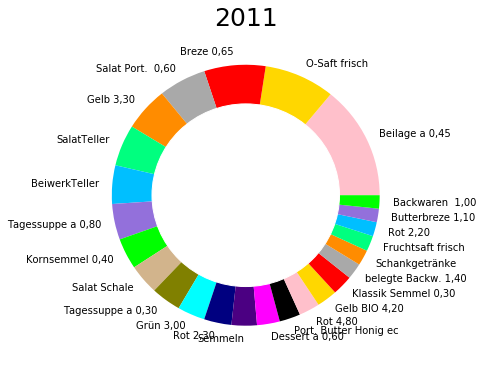

In [253]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.ItemDescription.value_counts().values[:25], labels=data2011.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


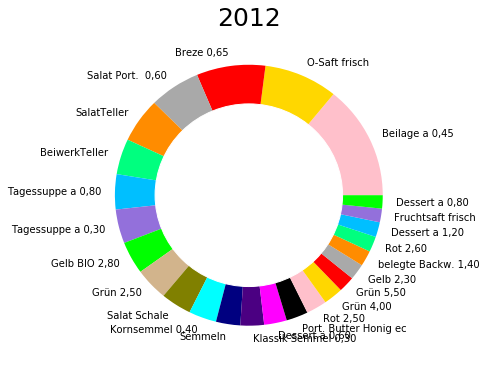

In [254]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.ItemDescription.value_counts().values[:25], labels=data2012.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


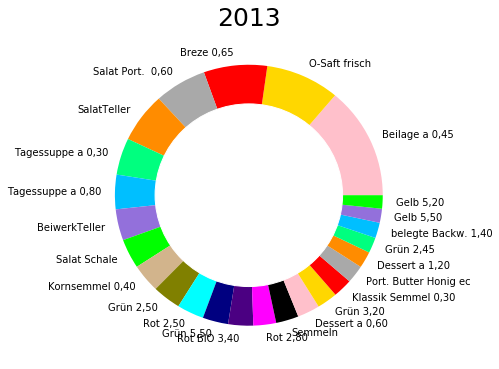

In [255]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.ItemDescription.value_counts().values[:25], labels=data2013.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


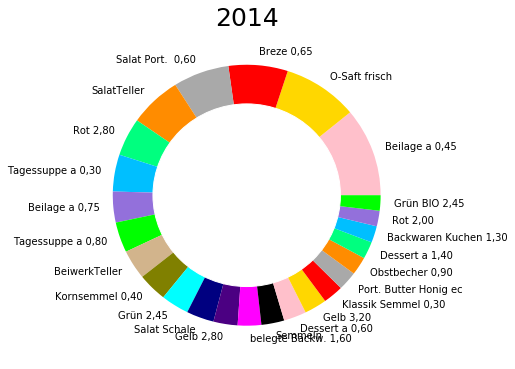

In [256]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.ItemDescription.value_counts().values[:25], labels=data2014.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


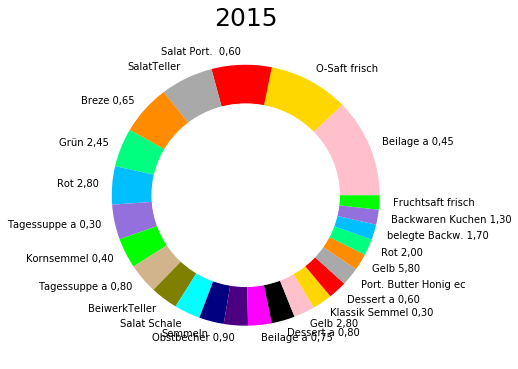

In [257]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.ItemDescription.value_counts().values[:25], labels=data2015.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


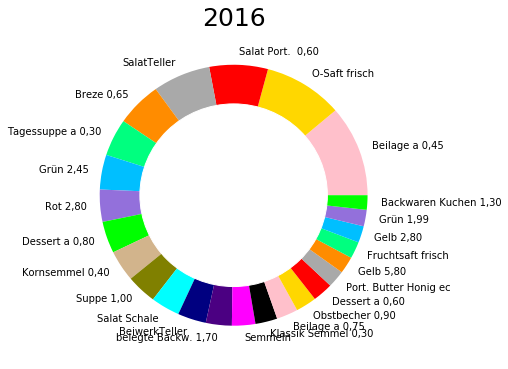

In [258]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.ItemDescription.value_counts().values[:25], labels=data2016.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


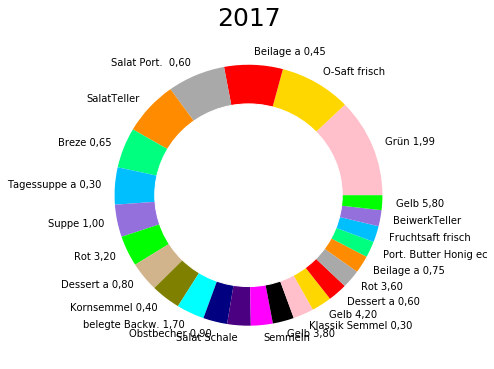

In [259]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.ItemDescription.value_counts().values[:25], labels=data2017.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


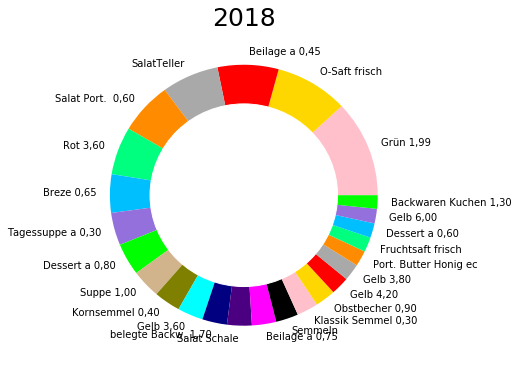

In [260]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.ItemDescription.value_counts().values[:25], labels=data2018.ItemDescription.value_counts().index[:25], 
colors=['pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','mediumpurple','lime','tan','olive' 
        ,'aqua' ,'navy', 'indigo','magenta','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


We have many items sold in those canteens and all their values are supposed correct because it's a description but it the next steps we will make sure that every itemsDescription and itemNumber are the same.

## Net Total

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



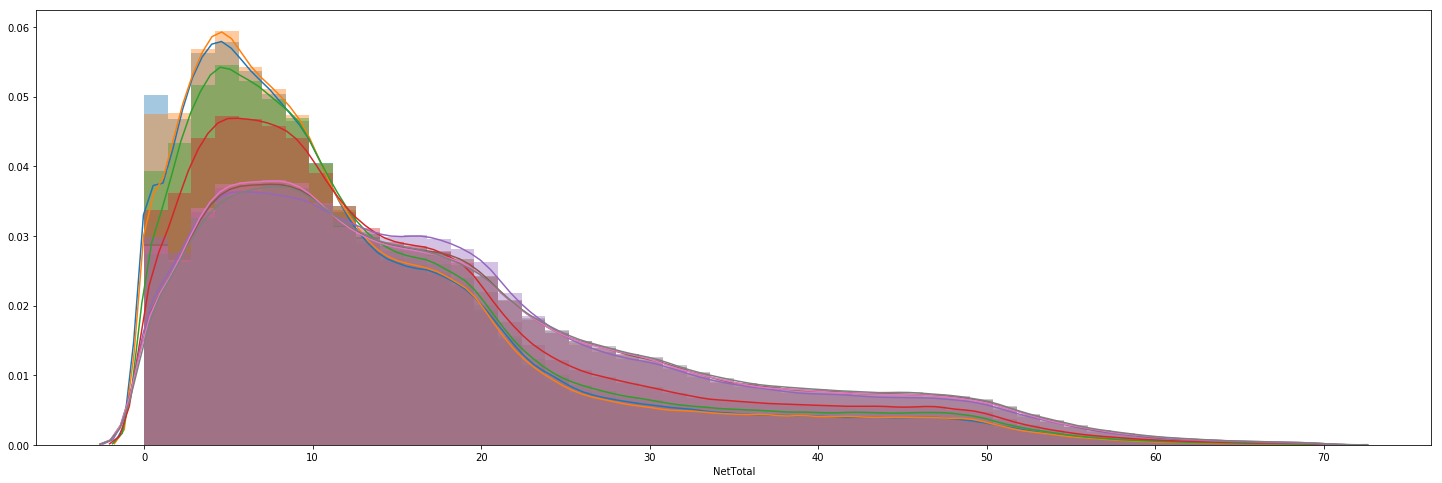

In [87]:
plt.figure(figsize=(25, 8))
sns.distplot(data2011['NetTotal'])
sns.distplot(data2012['NetTotal'])
sns.distplot(data2013['NetTotal'])
sns.distplot(data2014['NetTotal'])
sns.distplot(data2015['NetTotal'])
sns.distplot(data2016['NetTotal'])
sns.distplot(data2017['NetTotal'])
sns.distplot(data2018['NetTotal'])

In [62]:
np.sqrt(1564107)

1250.6426348082014

According to the distribution we have some outliers we are goning to eliminate them.

In [96]:
data_mean = np.mean(data2018['Amount'])
data_median = np.median(data2015['Amount'])
data_sd = np.std(data2017['Amount'])

print("Mean:{}\nMedian:{}\nStandard Deviation:{}".format(data_mean, data_median, data_sd))



Mean:0.9959062898603541
Median:1.0
Standard Deviation:0.38739710243580794


In [86]:
data2011=data2011[(data2011.NetTotal>=0) & (data2011.NetTotal<70)]
data2012=data2012[(data2012.NetTotal>=0) & (data2012.NetTotal<70)]
data2013=data2013[(data2013.NetTotal>=0) & (data2013.NetTotal<70)]
data2014=data2014[(data2014.NetTotal>=0) & (data2014.NetTotal<70)]
data2015=data2015[(data2015.NetTotal>=0) & (data2015.NetTotal<70)]
data2016=data2016[(data2016.NetTotal>=0) & (data2016.NetTotal<70)]
data2017=data2017[(data2017.NetTotal>=0) & (data2017.NetTotal<70)]
data2018=data2018[(data2018.NetTotal>=0) & (data2018.NetTotal<70)]

## Standard Price

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



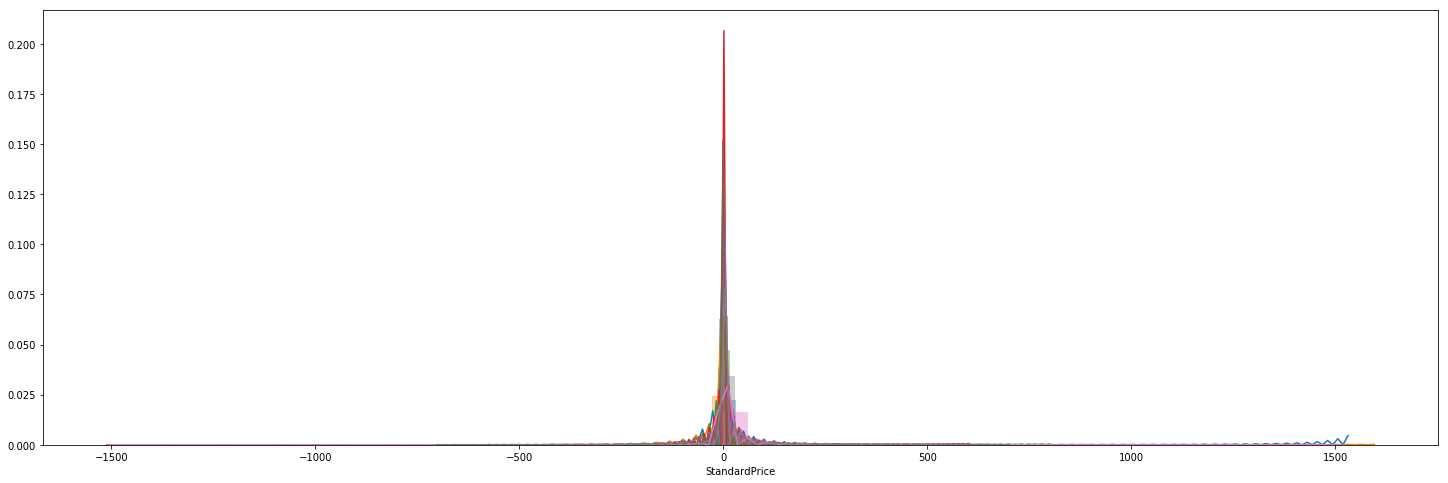

In [8]:
plt.figure(figsize=(25, 8));
sns.distplot(data2011['StandardPrice']);
sns.distplot(data2012['StandardPrice']);
sns.distplot(data2013['StandardPrice']);
sns.distplot(data2014['StandardPrice']);
sns.distplot(data2015['StandardPrice']);
sns.distplot(data2016['StandardPrice']);
sns.distplot(data2017['StandardPrice']);
sns.distplot(data2018['StandardPrice']);

In [110]:
data_mean = np.mean(data2015['Weight'])
data_median = np.median(data2015['Weight'])
data_sd = np.std(data2015['Weight'])

print("Mean:{}\nMedian:{}\nStandard Deviation:{}".format(data_mean, data_median, data_sd))



Mean:25.641302809833594
Median:0.0
Standard Deviation:90.99198942048679


According to the distribution we have some outliers we are goning to eliminate them such as the standard price must be positive.

In [264]:
data2011=data2011[(data2011.StandardPrice>=0) & (data2011.StandardPrice<10)]
data2012=data2012[(data2012.StandardPrice>=0) & (data2012.StandardPrice<10)]
data2013=data2013[(data2013.StandardPrice>=0) & (data2013.StandardPrice<10)]
data2014=data2014[(data2014.StandardPrice>=0) & (data2014.StandardPrice<10)]
data2015=data2015[(data2015.StandardPrice>=0) & (data2015.StandardPrice<10)]
data2016=data2016[(data2016.StandardPrice>=0) & (data2016.StandardPrice<10)]
data2017=data2017[(data2017.StandardPrice>=0) & (data2017.StandardPrice<10)]
data2018=data2018[(data2018.StandardPrice>=0) & (data2018.StandardPrice<10)]

## Key Card Counter

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



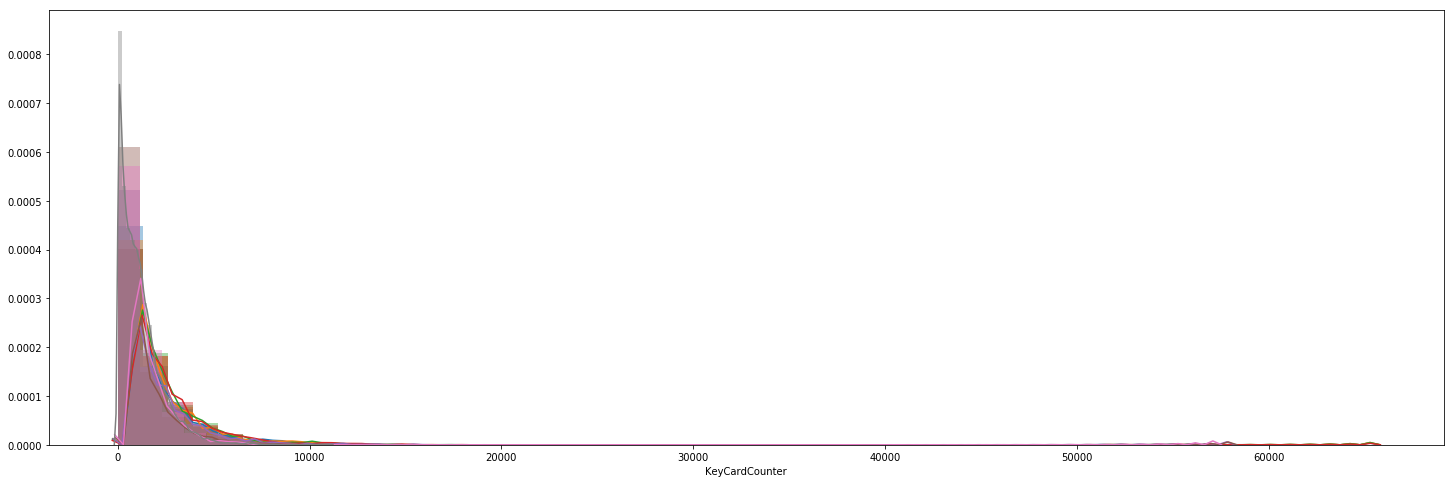

In [9]:
plt.figure(figsize=(25, 8))
sns.distplot(data2011['KeyCardCounter'])
sns.distplot(data2012['KeyCardCounter'])
sns.distplot(data2013['KeyCardCounter'])
sns.distplot(data2014['KeyCardCounter'])
sns.distplot(data2015['KeyCardCounter'])
sns.distplot(data2016['KeyCardCounter'])
sns.distplot(data2017['KeyCardCounter'])
sns.distplot(data2018['KeyCardCounter'])

According to the distribution we have some outliers we are goning to eliminate them for example it's hard that a client make 40k purchase with a average of 13 purchases daily that is why we will eliminate them.

In [266]:
data2011=data2011[(data2011.KeyCardCounter>=0) & (data2011.KeyCardCounter<10000)]
data2012=data2012[(data2012.KeyCardCounter>=0) & (data2012.KeyCardCounter<10000)]
data2013=data2013[(data2013.KeyCardCounter>=0) & (data2013.KeyCardCounter<10000)]
data2014=data2014[(data2014.KeyCardCounter>=0) & (data2014.KeyCardCounter<10000)]
data2015=data2015[(data2015.KeyCardCounter>=0) & (data2015.KeyCardCounter<10000)]
data2016=data2016[(data2016.KeyCardCounter>=0) & (data2016.KeyCardCounter<10000)]
data2017=data2017[(data2017.KeyCardCounter>=0) & (data2017.KeyCardCounter<10000)]
data2018=data2018[(data2018.KeyCardCounter>=0) & (data2018.KeyCardCounter<10000)]

## Weight

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



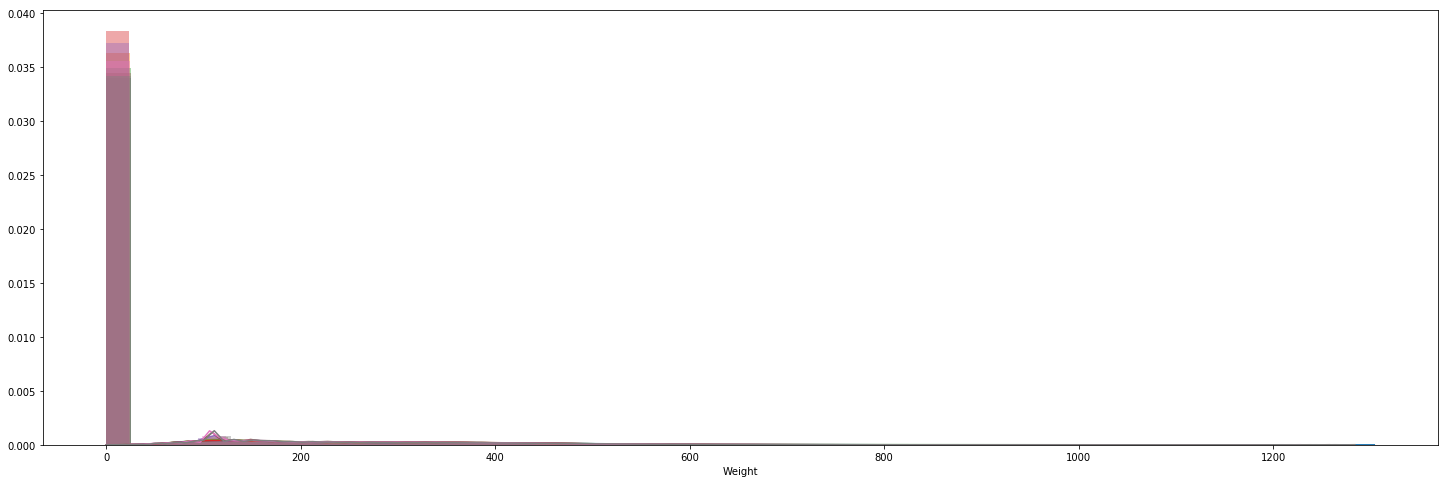

In [267]:
plt.figure(figsize=(25, 8))
sns.distplot(data2011['Weight'])
sns.distplot(data2012['Weight'])
sns.distplot(data2013['Weight'])
sns.distplot(data2014['Weight'])
sns.distplot(data2015['Weight'])
sns.distplot(data2016['Weight'])
sns.distplot(data2017['Weight'])
sns.distplot(data2018['Weight'])

Since not all the items have the attribute weight the distribution is high a zero we wanted to see the global weight of the weights of the measurable items. According to the distribution it's highly distributed around 80 g.

In [165]:
data2011=data2011[(data2011.Weight>=0) & (data2011.Weight<500)]
data2012=data2012[(data2012.Weight>=0) & (data2012.Weight<500)]
data2013=data2013[(data2013.Weight>=0) & (data2013.Weight<500)]
data2014=data2014[(data2014.Weight>=0) & (data2014.Weight<500)]
data2015=data2015[(data2015.Weight>=0) & (data2015.Weight<500)]
data2016=data2016[(data2016.Weight>=0) & (data2016.Weight<500)]
data2017=data2017[(data2017.Weight>=0) & (data2017.Weight<500)]
data2018=data2018[(data2018.Weight>=0) & (data2018.Weight<500)]

## Currency Flag

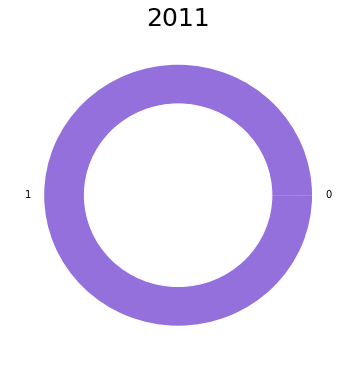

In [166]:
plt.figure(figsize=(6,6))
plt.title('2011', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2011.CurrencyFlag.value_counts().values, labels=data2011.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


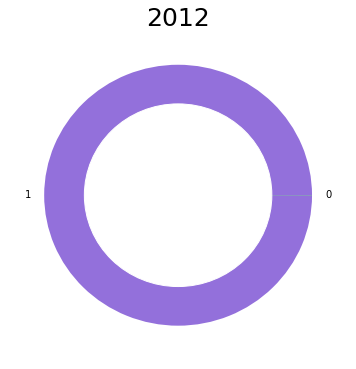

In [167]:
plt.figure(figsize=(6,6))
plt.title('2012', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2012.CurrencyFlag.value_counts().values, labels=data2012.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


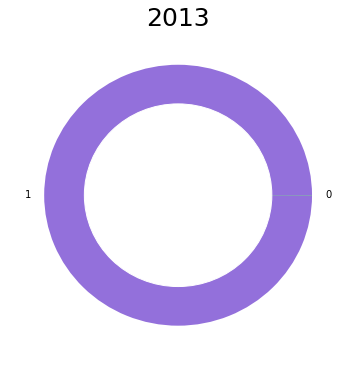

In [168]:
plt.figure(figsize=(6,6))
plt.title('2013', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2013.CurrencyFlag.value_counts().values, labels=data2013.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


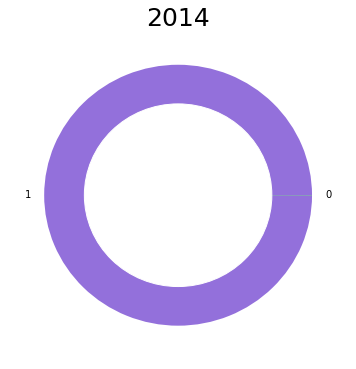

In [169]:
plt.figure(figsize=(6,6))
plt.title('2014', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2014.CurrencyFlag.value_counts().values, labels=data2014.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


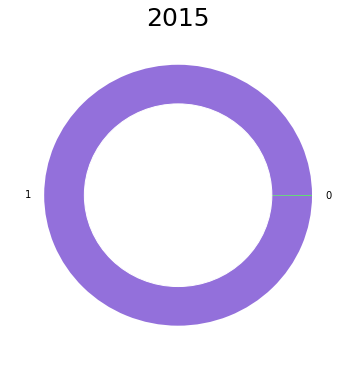

In [170]:
plt.figure(figsize=(6,6))
plt.title('2015', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2015.CurrencyFlag.value_counts().values, labels=data2015.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


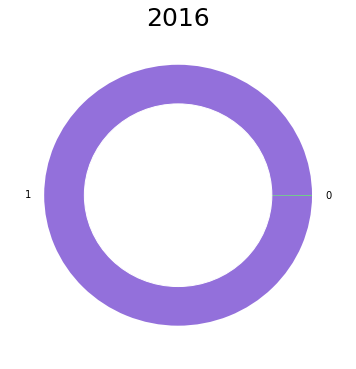

In [171]:
plt.figure(figsize=(6,6))
plt.title('2016', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2016.CurrencyFlag.value_counts().values, labels=data2016.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


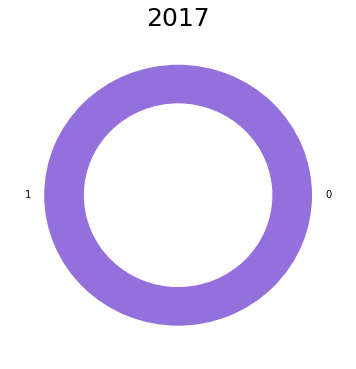

In [172]:
plt.figure(figsize=(6,6))
plt.title('2017', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2017.CurrencyFlag.value_counts().values, labels=data2017.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


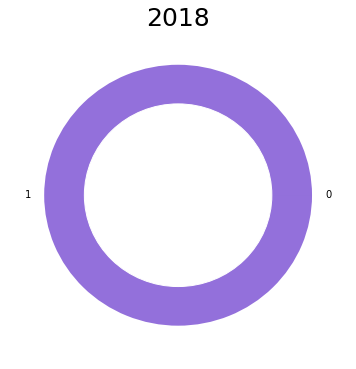

In [173]:
plt.figure(figsize=(6,6))
plt.title('2018', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data2018.CurrencyFlag.value_counts().values, labels=data2018.CurrencyFlag.value_counts().index, 
colors=['mediumpurple','lime','pink','gold','r','darkgray','darkorange','springgreen','deepskyblue','tan','olive' 
        ,'aqua' ,'navy', 'indigo','k'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Always equals 1 which stands for euro so we are going to ignore it

In [268]:
#Run this only once 
data2011.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2012.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2013.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2014.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2015.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2016.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2017.drop(['CurrencyFlag'], axis = 1,inplace=True)
data2018.drop(['CurrencyFlag'], axis = 1,inplace=True)

## Exporting the data to csv files

In [181]:
data2011.to_csv('data2011_cleaned.csv',index=False,encoding='latin-1')
data2012.to_csv('data2012_cleaned.csv',index=False,encoding='latin-1')
data2013.to_csv('data2013_cleaned.csv',index=False,encoding='latin-1')
data2014.to_csv('data2014_cleaned.csv',index=False,encoding='latin-1')
data2015.to_csv('data2015_cleaned.csv',index=False,encoding='latin-1')
data2016.to_csv('data2016_cleaned.csv',index=False,encoding='latin-1')
data2017.to_csv('data2017_cleaned.csv',index=False,encoding='latin-1')
data2018.to_csv('data2018_cleaned.csv',index=False,encoding='latin-1')

# Merging all the datasets into one

In [184]:
# With glob will help us the load the files easier
all_data=glob.glob('data20*_cleaned.csv') # here we have to choose where the files are 
data=pd.DataFrame()
for d in all_data:
    df = pd.read_csv(d,sep=',',decimal='.', quotechar='"',encoding='latin-1');
    data = data.append(df,ignore_index=True);

In [269]:
data.to_csv('finalData.csv',index=False,encoding='latin-1')

In [14]:
data= pd.read_csv('finalData.csv', quotechar='"',encoding='latin-1',low_memory=True);

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704103 entries, 0 to 9704102
Data columns (total 19 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
PriceList          int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
dtypes: float64(4), int64(10), object(5)
memory usage: 1.4+ GB


In [4]:
data.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,PriceList,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight
0,2011-01-03,07:29,1,1195883,6,K/C,13753,11,1,V,511,7.0,1,1.00,"Backwaren 1,00",5.54,1.00,776,0
1,2011-01-03,07:30,1,1195884,6,K/C,17150,11,1,V,1211,7.0,1,0.96,Leberkäse Semmel,4.16,0.96,3774,128
2,2011-01-03,07:30,1,1195884,6,K/C,17150,11,1,V,500,7.0,1,0.20,Semmeln,4.16,0.20,3774,0
3,2011-01-03,07:34,1,1195885,6,K/C,79210,2,2,V,1213,7.0,1,2.03,Leberkäse Teller,12.61,1.62,939,216
4,2011-01-03,07:34,1,1195885,6,K/C,79210,2,2,V,500,7.0,1,0.25,Semmeln,12.61,0.20,939,0


In [5]:
data.tail()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,PriceList,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight
9704098,2018-12-07,13:12,14,162890,7,K/C,48863,11,1,V,935,0.0,1,0.0,Frühstück,29.70,0.0,984,0
9704099,2018-12-12,09:48,14,162891,7,K/C,90520,11,1,V,901,19.0,1,0.4,"Obst 0,40",29.52,0.4,223,0
9704100,2018-12-12,12:51,14,162892,7,K/C,48863,11,1,V,936,0.0,1,0.0,Mittagessen,24.20,0.0,986,0
9704101,2018-12-12,12:51,14,162892,7,K/C,48863,11,1,V,935,0.0,1,0.0,Frühstück,24.20,0.0,986,0
9704102,2018-12-17,12:55,14,162893,7,K/C,94120,11,1,V,1510,19.0,1,0.5,Küche frei,8.77,0.5,176,0


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['week'] = pd.DatetimeIndex(data['Date']).week

In [17]:
#  Monday is 0 and Sunday is 6
data['day'] = pd.DatetimeIndex(data['Date']).weekday

In [18]:
by_year = pd.DataFrame(data, columns=['year', 'Revenue']).groupby('year').sum()
by_month = pd.DataFrame(data, columns=['month', 'Revenue']).groupby('month').sum()
by_week = pd.DataFrame(data, columns=['week', 'Revenue']).groupby('week').sum()

In [19]:
by_year_guests = pd.DataFrame(data, columns=['year','Date']).groupby('year').count()
by_month_guests = pd.DataFrame(data, columns=['month','Date']).groupby('month').count()
by_week_guests = pd.DataFrame(data, columns=['week','Date']).groupby('week').count()

### Exporting Lehel and Giesing's data

In [11]:
dataLehel=data[data.CashPoint.isin([1,2])]
dataGiesing=data[data.CashPoint.isin([11,12,13,14])]

NameError: name 'data' is not defined

In [12]:
dataLehel.to_csv('dataLehel_cleaned.csv',index=False,encoding='latin-1')
dataGiesing.to_csv('dataGiesing_cleaned.csv',index=False,encoding='latin-1')

In [11]:
dataLehel.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,PriceList,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,year,month,week,day
0,2011-01-03,07:29,1,1195883,6,K/C,13753,11,1,V,511,7.0,1,1.00,"Backwaren 1,00",5.54,1.00,776,0,2011,1,1,0
1,2011-01-03,07:30,1,1195884,6,K/C,17150,11,1,V,1211,7.0,1,0.96,Leberkäse Semmel,4.16,0.96,3774,128,2011,1,1,0
2,2011-01-03,07:30,1,1195884,6,K/C,17150,11,1,V,500,7.0,1,0.20,Semmeln,4.16,0.20,3774,0,2011,1,1,0
3,2011-01-03,07:34,1,1195885,6,K/C,79210,2,2,V,1213,7.0,1,2.03,Leberkäse Teller,12.61,1.62,939,216,2011,1,1,0
4,2011-01-03,07:34,1,1195885,6,K/C,79210,2,2,V,500,7.0,1,0.25,Semmeln,12.61,0.20,939,0,2011,1,1,0


In [12]:
dataLehel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966067 entries, 0 to 8797607
Data columns (total 23 columns):
Date               datetime64[ns]
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
PriceList          int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
year               int64
month              int64
week               int64
day                int64
dtypes: datetime64[ns](1), float64(4), int64(14), object(4)
memory usage: 360.0+ MB


In [13]:
dataGiesing.head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,PriceList,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,year,month,week,day
260712,2011-01-03,07:25,11,2186713,7,K/C,130230,11,1,V,1021,7.0,1,0.25,Port. Butter Honig ec,18.79,0.25,3719,0,2011,1,1,0
260713,2011-01-03,07:25,11,2186713,7,K/C,130230,11,1,V,507,7.0,1,0.35,"Breze 0,65",18.79,0.35,3719,0,2011,1,1,0
260714,2011-01-03,07:25,11,2186714,7,K/C,130840,11,1,V,1009,7.0,1,0.60,"Molkereiprodukte 0,60",20.39,0.60,3141,0,2011,1,1,0
260715,2011-01-03,07:25,11,2186715,7,K/C,32312,11,1,V,604,7.0,1,1.35,"belegte Backw. 1,35",0.79,1.35,5101,0,2011,1,1,0
260716,2011-01-03,07:26,11,2186716,7,K/C,42112,11,0,V,506,7.0,1,0.40,"Kornsemmel 0,40",6.12,0.40,627,0,2011,1,1,0


In [14]:
dataGiesing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7738036 entries, 260712 to 9704102
Data columns (total 23 columns):
Date               datetime64[ns]
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
PriceList          int64
PositionType       object
ItemNumber         int64
Taxes              float64
Amount             int64
Revenue            float64
ItemDescription    object
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             int64
year               int64
month              int64
week               int64
day                int64
dtypes: datetime64[ns](1), float64(4), int64(14), object(4)
memory usage: 1.4+ GB


In [15]:
by_year_Lehel = pd.DataFrame(dataLehel, columns=['year', 'Revenue']).groupby('year').sum()
by_month_Lehel = pd.DataFrame(dataLehel, columns=['month', 'Revenue']).groupby('month').sum()
by_week_Lehel = pd.DataFrame(dataLehel, columns=['week', 'Revenue']).groupby('week').sum()
by_year_Giesing = pd.DataFrame(dataGiesing, columns=['year', 'Revenue']).groupby('year').sum()
by_month_Giesing = pd.DataFrame(dataGiesing, columns=['month', 'Revenue']).groupby('month').sum()
by_week_Giesing = pd.DataFrame(dataGiesing, columns=['week', 'Revenue']).groupby('week').sum()

In [16]:
by_year_guests_Lehel = pd.DataFrame(dataLehel, columns=['year','Date']).groupby('year').count()
by_month_guests_Lehel = pd.DataFrame(dataLehel, columns=['month','Date']).groupby('month').count()
by_week_guests_Lehel = pd.DataFrame(dataLehel, columns=['week','Date']).groupby('week').count()
by_year_guests_Giesing = pd.DataFrame(dataGiesing, columns=['year','Date']).groupby('year').count()
by_month_guests_Giesing = pd.DataFrame(dataGiesing, columns=['month','Date']).groupby('month').count()
by_week_guests_Giesing = pd.DataFrame(dataGiesing, columns=['week','Date']).groupby('week').count()

## Data visualization

In [20]:
data['test']=data['ItemDescription'].apply(lambda x: (bool(re.search("Gelb",x)))|(bool(re.search("Rot",x)))|(bool(re.search("Grün",x))))
dishes=data[(data['test']==True)]
dishes_byyear = pd.DataFrame(dishes, columns=['year','ItemDescription','test']).groupby(['year','ItemDescription']).count()
dff_year = {
    "ind1" : dishes_byyear.test.index.to_frame(index=False).year.values,
    "ind2" : dishes_byyear.test.index.to_frame(index=False).ItemDescription.values,
    "vals" : dishes_byyear.test.values
}
p_year = pd.DataFrame(dff_year)
listed_year = [ p_year.loc[p_year.ind1==i].sort_values(by="vals", ascending=False).head(20) for i in range(2011,2019) ]

dishes=data[(data['test']==True)]
dishes_bymonth = pd.DataFrame(dishes, columns=['month','ItemDescription','test']).groupby(['month','ItemDescription']).count()
dff_month = {
    "ind1" : dishes_bymonth.test.index.to_frame(index=False).month.values,
    "ind2" : dishes_bymonth.test.index.to_frame(index=False).ItemDescription.values,
    "vals" : dishes_bymonth.test.values
}
p_month = pd.DataFrame(dff_month)
listed_month = [ p_month.loc[p_month.ind1==i].sort_values(by="vals", ascending=False).head(20) for i in range(1,13) ]

dishes_byweek= pd.DataFrame(dishes, columns=['week','ItemDescription','test']).groupby(['week','ItemDescription']).count()

dff_week= {
    "ind1" : dishes_byweek.test.index.to_frame(index=False).week.values,
    "ind2" : dishes_byweek.test.index.to_frame(index=False).ItemDescription.values,
    "vals" : dishes_byweek.test.values
}
p_week = pd.DataFrame(dff_week)
listed_week = [ p_week.loc[p_week.ind1==i].sort_values(by="vals", ascending=False).head(20) for i in range(1,53) ]

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

year = go.Scatter(x=list(by_year.index),
                        y=list(by_year.Revenue),
                        name='Year',
                        line=dict(color='#F06A6A'))
trace_avg_year = go.Scatter(x=list(by_year.index),
                            y=[by_year.Revenue.mean()]*len(by_year.index),
                            name='Year Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
week = go.Scatter(x=list(by_week.index),
                       y=list(by_week.Revenue),
                       name='Week',
                       line=dict(color='#F06A6A'))
trace_avg_week = go.Scatter(x=list(by_week.index),
                            y=[by_week.Revenue.mean()]*len(by_week.index),
                            name='Week Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
month = go.Scatter(x=list(by_month.index),
                          y=list(by_month.Revenue),
                       name='Month',
                           line=dict(color='#F06A6A'))
trace_avg_month = go.Scatter(x=list(by_month.index),
                            y=[by_month.Revenue.mean()]*len(by_month.index),
                            name='Month Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
data_plot = [year,trace_avg_year, month,trace_avg_month, week,trace_avg_week]
year_annotations=[dict(x=by_year.index,
                       y=by_year.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_year.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year.Revenue.idxmax(),
                       y=by_year.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_year.Revenue.max(),3)),
                       ax=0, ay=-40),
                 dict(x=by_year.Revenue.idxmin(),
                       y=by_year.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_year.Revenue.min(),3)),
                       ax=0, ay=-40)]
month_annotations=[dict(x=by_month.index,
                       y=by_month.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_month.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month.Revenue.idxmax(),
                       y=by_month.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_month.Revenue.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month.Revenue.idxmin(),
                       y=by_month.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_month.Revenue.min(),3)),
                       ax=0, ay=-40)]
week_annotations=[dict(x=by_week.index,
                       y=by_week.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_week.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week.Revenue.idxmax(),
                       y=by_week.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_week.Revenue.max(),3)),
                       ax=0, ay=-40),
                 dict(x=by_week.Revenue.idxmin(),
                       y=by_week.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_week.Revenue.min(),3)),
                       ax=0, ay=-40)]
updatemenus = list([
    dict(
        active=0,
         buttons=list([   
            dict(label = 'Yearly',
                 method = 'update',
                 args = [{'visible': [True,True, False, False ,False, False]},
                         {'title': 'Yearly Revenue',
                          'annotations': year_annotations}]),
            dict(label = 'Monthly',
                 method = 'update',
                 args = [{'visible': [False,False, True, True, False,False]},
                         {'title': 'Monthly Revenue',
                          'annotations': month_annotations}]),
            dict(label = 'Weekly',
                 method = 'update',
                 args = [{'visible': [False, False, False, False ,True, True]},
                         {'title': 'Weekly Revenue',
                          'annotations': week_annotations}]),
        ]),

    )
])

layout = dict(title='Revenue', showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data_plot, layout=layout)
py.iplot(fig, filename='update_dropdown')

In [22]:
import plotly.plotly as py2
import plotly.graph_objs as go2

from datetime import datetime
import pandas as pd

year1 = go2.Scatter(x=list(by_year_guests.index),
                        y=list(by_year_guests.Date),
                        name='Year',
                        line=dict(color='#F06A6A'))

trace_avg_year1 = go2.Scatter(x=list(by_year_guests.index),
                            y=[by_year_guests.Date.mean()]*len(by_year_guests.index),
                            name='Year Average',
                            visible=True,
                            line=dict(color='#33CFA5', dash='dash'))

week1 = go2.Scatter(x=list(by_week_guests.index),
                       y=list(by_week_guests.Date),
                       name='Week',
                       line=dict(color='#F06A6A'))

trace_avg_week1 = go2.Scatter(x=list(by_week.index),
                            y=[by_week_guests.Date.mean()]*len(by_week_guests.index),
                            name='Week Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))



month1 = go2.Scatter(x=list(by_month_guests.index),
                          y=list(by_month_guests.Date),
                       name='Month',
                           line=dict(color='#F06A6A'))

trace_avg_month1 = go2.Scatter(x=list(by_month_guests.index),
                            y=[by_month_guests.Date.mean()]*len(by_month_guests.index),
                            name='Month Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

data_plot1 = [year1,trace_avg_year1, month1,trace_avg_month1, week1,trace_avg_week1]

year_annotations1=[dict(x=by_year_guests.index,
                       y=by_year_guests.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_year_guests.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_guests.Date.idxmax(),
                       y=by_year_guests.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_year_guests.Date.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_guests.Date.idxmin(),
                       y=by_year_guests.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_year_guests.Date.min(),3)),
                       ax=0, ay=-40)]

month_annotations1=[dict(x=by_month_guests.index,
                       y=by_month_guests.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_month_guests.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_guests.Date.idxmax(),
                       y=by_month_guests.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_month_guests.Date.max(),3)),
                       ax=0, ay=-40),
                   dict(x=by_month_guests.Date.idxmin(),
                       y=by_month_guests.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_month_guests.Date.min(),3)),
                       ax=0, ay=-40)]

week_annotations1=[dict(x=by_week_guests.index,
                       y=by_week_guests.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_week_guests.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_guests.Date.idxmax(),
                       y=by_week_guests.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_week_guests.Date.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_guests.Date.idxmin(),
                       y=by_week_guests.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_week_guests.Date.min(),3)),
                       ax=0, ay=-40)]
updatemenus1 = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'Yearly',
                 method = 'update',
                 args = [{'visible': [True,True, False, False ,False, False]},
                         {'title': 'Yearly Guests',
                          'annotations': year_annotations1}]),
            dict(label = 'Monthly',
                 method = 'update',
                 args = [{'visible': [False,False, True, True, False,False]},
                         {'title': 'Monthly Guests',
                          'annotations': month_annotations1}]),
            dict(label = 'Weekly',
                 method = 'update',
                 args = [{'visible': [False, False, False, False ,True, True]},
                         {'title': 'Weekly Guests',
                          'annotations': week_annotations1}]),
        ]),
    )
])

layout1 = dict(title='Number of Guests', showlegend=False,
              updatemenus=updatemenus1)

fig1 = dict(data=data_plot1, layout=layout1)
py2.iplot(fig1, filename='update_dropdown1')

In [23]:
import plotly.plotly as py2
import plotly.graph_objs as go2

from datetime import datetime
import pandas as pd

pie0 = go.Pie(labels = listed_year[0].ind2.values,values = listed_year[0].vals.values )
pie1 = go.Pie(labels = listed_year[1].ind2.values,values = listed_year[1].vals.values )
pie2 = go.Pie(labels = listed_year[2].ind2.values,values = listed_year[2].vals.values )
pie3 = go.Pie(labels = listed_year[3].ind2.values,values = listed_year[3].vals.values )
pie4 = go.Pie(labels = listed_year[4].ind2.values,values = listed_year[4].vals.values )
pie5 = go.Pie(labels = listed_year[5].ind2.values,values = listed_year[5].vals.values )
pie6 = go.Pie(labels = listed_year[6].ind2.values,values = listed_year[6].vals.values )
pie7 = go.Pie(labels = listed_year[7].ind2.values,values = listed_year[7].vals.values )

data_plot1 = [pie0,pie1,pie2,pie3,pie4,pie5,pie6,pie7]


updatemenus1 = list([
    dict(active=0,
         
         buttons=list([   
            dict(label = '2011',
                 method = 'update',
                 args = [{'visible': [True,False, False,False,False,False,False,False]},
                         {'title': 'Top Dishes in 2011'
                          }]),
             
            dict(label = '2012',
                 method = 'update',
                 args = [{'visible': [False,True, False,False,False,False,False,False]},
                         {'title': 'Top Dishes in 2012'}]),
            dict(label = '2013',
                 method = 'update',
                 args = [{'visible': [False, False, True,False,False,False,False,False]},
                         {'title': 'Top Dishes in 2013'}]),
             dict(label = '2014',
                 method = 'update',
                 args = [{'visible': [False,False, False,True,False,False,False,False]},
                         {'title': 'Top Dishes in 2014'}]),
             dict(label = '2015',
                 method = 'update',
                 args = [{'visible': [False,False,False,False,True,False, False,False]},
                         {'title': 'Top Dishes in 2015'}]),
             dict(label = '2016',
                 method = 'update',
                 args = [{'visible': [False,False,False,False,False,True, False,False]},
                         {'title': 'Top Dishes in 2016'}]),
             dict(label = '2017',
                 method = 'update',
                 args = [{'visible': [False,False,False,False,False,False, True,False]},
                         {'title': 'Top Dishes in 2017'}]),
             dict(label = '2018',
                 method = 'update',
                 args = [{'visible': [False,False,False,False,False,False, False,True]},
                         {'title': 'Top Dishes in 2018'}]),
        ]), 

    )    

    
])

layout1 = dict(title='Top Dishes per year', showlegend=False,
              updatemenus=updatemenus1)

fig1 = dict(data=data_plot1, layout=layout1)
py2.iplot(fig1, filename='update_dropdown1')

In [24]:
import plotly.plotly as py2
import plotly.graph_objs as go2

from datetime import datetime
import pandas as pd
for i in range(12):
      data_plot1.append(go.Pie(labels = listed_month[i].ind2.values,values = listed_month[i].vals.values ))

updatemenus1 = list([
    dict(active=0,
         
         buttons=list([   
            dict(label = 'January',
                 method = 'update',
                 args = [{'visible': [True,False, False,False,False,False,False,False,False, False,False,False]},
                         {'title': 'Top sold dishes in January'
                          }]),
             
            dict(label = 'February',
                 method = 'update',
                 args = [{'visible': [False,True, False,False,False,False,False,False,False, False,False,False]},
                         {'title': 'Top sold dishes in February'}]),
            dict(label = 'March',
                 method = 'update',
                 args = [{'visible': [False,False, True,False,False,False,False,False,False, False,False,False]},
                         {'title': 'Top sold dishes in March'}]),
             dict(label = 'April',
                 method = 'update',
                 args = [{'visible': [False,False, False,True,False,False,False,False,False, False,False,False]},
                         {'title': 'Top sold dishes in April'}]),
             dict(label = 'May',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,True,False,False,False,False, False,False,False]},
                         {'title': 'Top sold dishes in May'}]),
             dict(label = 'June',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,True,False,False,False, False,False,False]},
                         {'title': 'Top sold dishes in June'}]),
             dict(label = 'July',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,False,True,False,False, False,False,False]},
                         {'title': 'Top sold dishes in July'}]),
             dict(label = 'August',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,False,False,True,False, False,False,False]},
                         {'title': 'Top sold dishes in August'}]),
             dict(label = 'September',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,False,False,False,True, False,False,False]},
                         {'title': 'Top sold dishes in September'}]),
             dict(label = 'October',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,False,False,False,False, True,False,False]},
                         {'title': 'Top sold dishes in October'}]),
             dict(label = 'November',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,False,False,False,False, False,True,False]},
                         {'title': 'Top sold dishes in November'}]),
             dict(label = 'December',
                 method = 'update',
                 args = [{'visible': [False,False, False,False,False,False,False,False,False, False,False,True]},
                         {'title': 'Top sold dishes in December'}]),
                          
                          

        ]),
    )
])

layout1 = dict(title='Top sold dishes per Month ', showlegend=False,
              updatemenus=updatemenus1)

fig1 = dict(data=data_plot1, layout=layout1)
py2.iplot(fig1, filename='update_dropdown1')

In [25]:
import plotly.plotly as py2
import plotly.graph_objs as go2
from datetime import datetime
import pandas as pd
data_plot1 = []
for i in range(52):   
    data_plot1=list(map(lambda i:go.Pie(labels = listed_week [i].ind2.values,values = listed_week [i].vals.values ),list(range(52))))
    #append(go.Pie(labels = listed_week [i].ind2.values,values = listed_week [i].vals.values ))

updatemenus1 = list([
    dict(active=0,
         buttons=list([   
            dict(label = '1',
                 method = 'update',
                 args = [{'visible': [True,False,False, False,False,False,False,False,False,False, False,False,False
                                    ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week1'
                          }]),
             
            dict(label = '2',
                 method = 'update',
                 args = [{'visible': [False,True,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week2'}]),
            dict(label = '3',
                 method = 'update',
                 args = [{'visible': [False,False,True, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week3'}]),
             dict(label = '4',
                 method = 'update',
                 args = [{'visible': [False,False,False, True,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week4'}]),
             dict(label = '5',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,True,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week5'}]),
             dict(label = '6',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,True,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week6'}]),
             dict(label = '7',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,True,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week7'}]),
             dict(label = '8',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,True,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week8'}]),
             dict(label = '9',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,True,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week9'}]),
             dict(label = '10',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,True, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week10'}]),
             dict(label = '11',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, True,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week11'}]),
             dict(label = '12',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,True,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week12'}]),
             dict(label = '13',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,True
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week13'}]),
             dict(label = '14',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,True,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week14'}]),
             dict(label = '15',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,True, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week15'}]),
             dict(label = '16',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, True,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week16'}]),
             dict(label = '17',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,True,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week17'}]),
             dict(label = '18',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,True,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week18'}]),
             dict(label = '19',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,True,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week19'}]),
             dict(label = '20',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,True,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week20'}]),
             dict(label = '21',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,True,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week21'}]),
             dict(label = '22',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,True, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week22'}]),
             dict(label = '23',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, True,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week23'}]),
             dict(label = '24',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,True,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week24'}]),
             dict(label = '25',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,True,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week25'}]),
             dict(label = '26',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     True,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week26'}]),
             dict(label = '27',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,True,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week27'}]),
             dict(label = '28',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,True, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week28'}]),
             dict(label = '29',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, True,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week29'}]),
             dict(label = '30',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,True,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week30'}]),
             dict(label = '31',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,True,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week31'}]),
             dict(label = '32',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,True,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week32'}]),
                          
             dict(label = '33',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,True,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week33'}]),
             dict(label = '34',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,True,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week34'}]),
             dict(label = '35',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,True, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week35'}]),
             dict(label = '36',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, True,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week36'}]),
             dict(label = '37',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,True,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week37'}]),
             dict(label = '38',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      True,False,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week38'}]),
                
             dict(label = '39',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,True,False, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week39'
                          }]),
             dict(label = '40',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,True, False,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week40'
                          }]),
             dict(label = '41',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, True,False,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week41'
                          }]),
             dict(label = '42',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,True,False,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week42'
                          }]),
             dict(label = '43',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,True,False,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week43'
                          }]),
             dict(label = '44',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,True,False,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week44'
                          }]),
             dict(label = '45',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,True,False,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week45'
                          }]),
             dict(label = '46',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,True,False, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week46'
                          }]),
             dict(label = '47',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,True, False,False,False, False,False]},
                         {'title': 'Top sold dishes in week47'
                          }]),
             dict(label = '48',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, True,False,False, False,False]},
                         {'title': 'Top sold dishes in week48'
                          }]),
             dict(label = '49',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,True,False, False,False]},
                         {'title': 'Top sold dishes in week49'
                          }]),
             dict(label = '50',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,True, False,False]},
                         {'title': 'Top sold dishes in week50'
                          }]),
             dict(label = '51',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False,True,False]},
                         {'title': 'Top sold dishes in week51'
                          }]),
             dict(label = '52',
                 method = 'update',
                 args = [{'visible': [False,False,False, False,False,False,False,False,False,False, False,False,False
                                      ,False,False, False,False,False,False,False,False,False, False,False,False,
                                     False,False,False, False,False,False,False,False,False,False, False,False,
                                      False,False,False, False,False,False,False,False,False,False, False,False,False,False,True]},
                         {'title': 'Top sold dishes in week52'
                          }]),
             
                        

        ]),
    )
])

layout1 = dict(title='Top sold dishes per week', showlegend=False,
              updatemenus=updatemenus1)

fig1 = dict(data=data_plot1, layout=layout1)
py2.iplot(fig1, filename='update_dropdown1')

### Giesing

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

year = go.Scatter(x=list(by_year_Giesing.index),
                        y=list(by_year_Giesing.Revenue),
                        name='Year',
                        line=dict(color='#F06A6A'))
trace_avg_year = go.Scatter(x=list(by_year_Giesing.index),
                            y=[by_year_Giesing.Revenue.mean()]*len(by_year_Giesing.index),
                            name='Year Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
week = go.Scatter(x=list(by_week_Giesing.index),
                       y=list(by_week_Giesing.Revenue),
                       name='Week',
                       line=dict(color='#F06A6A'))
trace_avg_week = go.Scatter(x=list(by_week_Giesing.index),
                            y=[by_week_Giesing.Revenue.mean()]*len(by_week_Giesing.index),
                            name='Week Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
month = go.Scatter(x=list(by_month_Giesing.index),
                          y=list(by_week_Giesing.Revenue),
                       name='Month',
                           line=dict(color='#F06A6A'))
trace_avg_month = go.Scatter(x=list(by_month_Giesing.index),
                            y=[by_month_Giesing.Revenue.mean()]*len(by_month_Giesing.index),
                            name='Month Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
data_plot = [year,trace_avg_year, month,trace_avg_month, week,trace_avg_week]
year_annotations=[dict(x=by_year_Giesing.index,
                       y=by_year_Giesing.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_year_Giesing.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_Giesing.Revenue.idxmax(),
                       y=by_year_Giesing.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_year_Giesing.Revenue.max(),3)),
                       ax=0, ay=-40),
                 dict(x=by_year_Giesing.Revenue.idxmin(),
                       y=by_year_Giesing.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_year_Giesing.Revenue.min(),3)),
                       ax=0, ay=-40)]
month_annotations=[dict(x=by_month_Giesing.index,
                       y=by_month_Giesing.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_month_Giesing.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_Giesing.Revenue.idxmax(),
                       y=by_month_Giesing.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_month_Giesing.Revenue.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_Giesing.Revenue.idxmin(),
                       y=by_month_Giesing.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_month_Giesing.Revenue.min(),3)),
                       ax=0, ay=-40)]
week_annotations=[dict(x=by_week_Giesing.index,
                       y=by_week_Giesing.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_week_Giesing.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_Giesing.Revenue.idxmax(),
                       y=by_week_Giesing.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_week_Giesing.Revenue.max(),3)),
                       ax=0, ay=-40),
                 dict(x=by_week_Giesing.Revenue.idxmin(),
                       y=by_week_Giesing.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_week_Giesing.Revenue.min(),3)),
                       ax=0, ay=-40)]
updatemenus = list([
    dict(
        active=0,
         buttons=list([   
            dict(label = 'Yearly',
                 method = 'update',
                 args = [{'visible': [True,True, False, False ,False, False]},
                         {'title': 'Yearly Revenue',
                          'annotations': year_annotations}]),
            dict(label = 'Monthly',
                 method = 'update',
                 args = [{'visible': [False,False, True, True, False,False]},
                         {'title': 'Monthly Revenue',
                          'annotations': month_annotations}]),
            dict(label = 'Weekly',
                 method = 'update',
                 args = [{'visible': [False, False, False, False ,True, True]},
                         {'title': 'Weekly Revenue',
                          'annotations': week_annotations}]),
        ]),

    )
])

layout = dict(title='Revenue', showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data_plot, layout=layout)
py.iplot(fig, filename='update_dropdown')

In [23]:
import plotly.plotly as py2
import plotly.graph_objs as go2

from datetime import datetime
import pandas as pd

year1 = go2.Scatter(x=list(by_year_guests_Giesing.index),
                        y=list(by_year_guests_Giesing.Date),
                        name='Year',
                        line=dict(color='#F06A6A'))

trace_avg_year1 = go2.Scatter(x=list(by_year_guests_Giesing.index),
                            y=[by_year_guests_Giesing.Date.mean()]*len(by_year_guests_Giesing.index),
                            name='Year Average',
                            visible=True,
                            line=dict(color='#33CFA5', dash='dash'))

week1 = go2.Scatter(x=list(by_week_guests_Giesing.index),
                       y=list(by_week_guests_Giesing.Date),
                       name='Week',
                       line=dict(color='#F06A6A'))

trace_avg_week1 = go2.Scatter(x=list(by_week.index),
                            y=[by_week_guests_Giesing.Date.mean()]*len(by_week_guests_Giesing.index),
                            name='Week Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))



month1 = go2.Scatter(x=list(by_month_guests_Giesing.index),
                          y=list(by_month_guests_Giesing.Date),
                       name='Month',
                           line=dict(color='#F06A6A'))

trace_avg_month1 = go2.Scatter(x=list(by_month_guests_Giesing.index),
                            y=[by_month_guests_Giesing.Date.mean()]*len(by_month_guests_Giesing.index),
                            name='Month Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

data_plot1 = [year1,trace_avg_year1, month1,trace_avg_month1, week1,trace_avg_week1]

year_annotations1=[dict(x=by_year_guests_Giesing.index,
                       y=by_year_guests_Giesing.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_year_guests_Giesing.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_guests_Giesing.Date.idxmax(),
                       y=by_year_guests_Giesing.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_year_guests_Giesing.Date.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_guests_Giesing.Date.idxmin(),
                       y=by_year_guests_Giesing.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_year_guests_Giesing.Date.min(),3)),
                       ax=0, ay=-40)]

month_annotations1=[dict(x=by_month_guests_Giesing.index,
                       y=by_month_guests_Giesing.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_month_guests_Giesing.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_guests_Giesing.Date.idxmax(),
                       y=by_month_guests_Giesing.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_month_guests_Giesing.Date.max(),3)),
                       ax=0, ay=-40),
                   dict(x=by_month_guests_Giesing.Date.idxmin(),
                       y=by_month_guests_Giesing.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_month_guests_Giesing.Date.min(),3)),
                       ax=0, ay=-40)]

week_annotations1=[dict(x=by_week_guests_Giesing.index,
                       y=by_week_guests_Giesing.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_week_guests_Giesing.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_guests_Giesing.Date.idxmax(),
                       y=by_week_guests_Giesing.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_week_guests_Giesing.Date.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_guests_Giesing.Date.idxmin(),
                       y=by_week_guests_Giesing.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_week_guests_Giesing.Date.min(),3)),
                       ax=0, ay=-40)]
updatemenus1 = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'Yearly',
                 method = 'update',
                 args = [{'visible': [True,True, False, False ,False, False]},
                         {'title': 'Yearly Guests',
                          'annotations': year_annotations1}]),
            dict(label = 'Monthly',
                 method = 'update',
                 args = [{'visible': [False,False, True, True, False,False]},
                         {'title': 'Monthly Guests',
                          'annotations': month_annotations1}]),
            dict(label = 'Weekly',
                 method = 'update',
                 args = [{'visible': [False, False, False, False ,True, True]},
                         {'title': 'Weekly Guests',
                          'annotations': week_annotations1}]),
        ]),
    )
])

layout1 = dict(title='Number of Guests', showlegend=False,
              updatemenus=updatemenus1)

fig1 = dict(data=data_plot1, layout=layout1)
py2.iplot(fig1, filename='update_dropdown1')

### Lehel

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

year = go.Scatter(x=list(by_year_Lehel.index),
                        y=list(by_year_Lehel.Revenue),
                        name='Year',
                        line=dict(color='#F06A6A'))
trace_avg_year = go.Scatter(x=list(by_year_Lehel.index),
                            y=[by_year_Lehel.Revenue.mean()]*len(by_year_Lehel.index),
                            name='Year Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
week = go.Scatter(x=list(by_week_Lehel.index),
                       y=list(by_week_Lehel.Revenue),
                       name='Week',
                       line=dict(color='#F06A6A'))
trace_avg_week = go.Scatter(x=list(by_week_Lehel.index),
                            y=[by_week_Lehel.Revenue.mean()]*len(by_week_Lehel.index),
                            name='Week Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
month = go.Scatter(x=list(by_month_Lehel.index),
                          y=list(by_month_Lehel.Revenue),
                       name='Month',
                           line=dict(color='#F06A6A'))
trace_avg_month = go.Scatter(x=list(by_month_Lehel.index),
                            y=[by_month_Lehel.Revenue.mean()]*len(by_month_Lehel.index),
                            name='Month Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
data_plot = [year,trace_avg_year, month,trace_avg_month, week,trace_avg_week]
year_annotations=[dict(x=by_year_Lehel.index,
                       y=by_year_Lehel.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_year_Lehel.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_Lehel.Revenue.idxmax(),
                       y=by_year_Lehel.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_year_Lehel.Revenue.max(),3)),
                       ax=0, ay=-40),
                 dict(x=by_year_Lehel.Revenue.idxmin(),
                       y=by_year_Lehel.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_year_Lehel.Revenue.min(),3)),
                       ax=0, ay=-40)]
month_annotations=[dict(x=by_month_Lehel.index,
                       y=by_month_Lehel.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_month_Lehel.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_Lehel.Revenue.idxmax(),
                       y=by_month_Lehel.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_month_Lehel.Revenue.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_Lehel.Revenue.idxmin(),
                       y=by_month_Lehel.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_month_Lehel.Revenue.min(),3)),
                       ax=0, ay=-40)]
week_annotations=[dict(x=by_week_Lehel.index,
                       y=by_week_Lehel.Revenue.mean(),
                       xref='x', yref='y',
                       text='Revenue Average:<br>'+str(round(by_week_Lehel.Revenue.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_Lehel.Revenue.idxmax(),
                       y=by_week_Lehel.Revenue.max(),
                       xref='x', yref='y',
                       text='Revenue Max:<br>'+str(round(by_week_Lehel.Revenue.max(),3)),
                       ax=0, ay=-40),
                 dict(x=by_week_Lehel.Revenue.idxmin(),
                       y=by_week_Lehel.Revenue.min(),
                       xref='x', yref='y',
                       text='Revenue Min:<br>'+str(round(by_week_Lehel.Revenue.min(),3)),
                       ax=0, ay=-40)]
updatemenus = list([
    dict(
        active=0,
         buttons=list([   
            dict(label = 'Yearly',
                 method = 'update',
                 args = [{'visible': [True,True, False, False ,False, False]},
                         {'title': 'Yearly Revenue',
                          'annotations': year_annotations}]),
            dict(label = 'Monthly',
                 method = 'update',
                 args = [{'visible': [False,False, True, True, False,False]},
                         {'title': 'Monthly Revenue',
                          'annotations': month_annotations}]),
            dict(label = 'Weekly',
                 method = 'update',
                 args = [{'visible': [False, False, False, False ,True, True]},
                         {'title': 'Weekly Revenue',
                          'annotations': week_annotations}]),
        ]),

    )
])

layout = dict(title='Revenue', showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data_plot, layout=layout)
py.iplot(fig, filename='update_dropdown')

In [26]:
import plotly.plotly as py2
import plotly.graph_objs as go2

from datetime import datetime
import pandas as pd

year1 = go2.Scatter(x=list(by_year_guests_Lehel.index),
                        y=list(by_year_guests_Lehel.Date),
                        name='Year',
                        line=dict(color='#F06A6A'))

trace_avg_year1 = go2.Scatter(x=list(by_year_guests_Lehel.index),
                            y=[by_year_guests_Lehel.Date.mean()]*len(by_year_guests_Lehel.index),
                            name='Year Average',
                            visible=True,
                            line=dict(color='#33CFA5', dash='dash'))

week1 = go2.Scatter(x=list(by_week_guests_Lehel.index),
                       y=list(by_week_guests_Lehel.Date),
                       name='Week',
                       line=dict(color='#F06A6A'))

trace_avg_week1 = go2.Scatter(x=list(by_week.index),
                            y=[by_week_guests_Lehel.Date.mean()]*len(by_week_guests_Lehel.index),
                            name='Week Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))



month1 = go2.Scatter(x=list(by_month_guests_Lehel.index),
                          y=list(by_month_guests_Lehel.Date),
                       name='Month',
                           line=dict(color='#F06A6A'))

trace_avg_month1 = go2.Scatter(x=list(by_month_guests_Lehel.index),
                            y=[by_month_guests_Lehel.Date.mean()]*len(by_month_guests_Lehel.index),
                            name='Month Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

data_plot1 = [year1,trace_avg_year1, month1,trace_avg_month1, week1,trace_avg_week1]

year_annotations1=[dict(x=by_year_guests_Lehel.index,
                       y=by_year_guests_Lehel.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_year_guests_Lehel.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_guests_Lehel.Date.idxmax(),
                       y=by_year_guests_Lehel.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_year_guests_Lehel.Date.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_year_guests_Lehel.Date.idxmin(),
                       y=by_year_guests_Lehel.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_year_guests_Lehel.Date.min(),3)),
                       ax=0, ay=-40)]

month_annotations1=[dict(x=by_month_guests_Lehel.index,
                       y=by_month_guests_Lehel.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_month_guests_Lehel.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_month_guests_Lehel.Date.idxmax(),
                       y=by_month_guests_Lehel.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_month_guests_Lehel.Date.max(),3)),
                       ax=0, ay=-40),
                   dict(x=by_month_guests_Lehel.Date.idxmin(),
                       y=by_month_guests_Lehel.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_month_guests_Lehel.Date.min(),3)),
                       ax=0, ay=-40)]

week_annotations1=[dict(x=by_week_guests_Lehel.index,
                       y=by_week_guests_Lehel.Date.mean(),
                       xref='x', yref='y',
                       text='Average Number of Guests:<br>'+str(round(by_week_guests_Lehel.Date.mean(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_guests_Lehel.Date.idxmax(),
                       y=by_week_guests_Lehel.Date.max(),
                       xref='x', yref='y',
                       text='Max Number of Guests:<br>'+str(round(by_week_guests_Lehel.Date.max(),3)),
                       ax=0, ay=-40),
                  dict(x=by_week_guests_Lehel.Date.idxmin(),
                       y=by_week_guests_Lehel.Date.min(),
                       xref='x', yref='y',
                       text='Min Number of Guests:<br>'+str(round(by_week_guests_Lehel.Date.min(),3)),
                       ax=0, ay=-40)]
updatemenus1 = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'Yearly',
                 method = 'update',
                 args = [{'visible': [True,True, False, False ,False, False]},
                         {'title': 'Yearly Guests',
                          'annotations': year_annotations1}]),
            dict(label = 'Monthly',
                 method = 'update',
                 args = [{'visible': [False,False, True, True, False,False]},
                         {'title': 'Monthly Guests',
                          'annotations': month_annotations1}]),
            dict(label = 'Weekly',
                 method = 'update',
                 args = [{'visible': [False, False, False, False ,True, True]},
                         {'title': 'Weekly Guests',
                          'annotations': week_annotations1}]),
        ]),
    )
])

layout1 = dict(title='Number of Guests', showlegend=False,
              updatemenus=updatemenus1)

fig1 = dict(data=data_plot1, layout=layout1)
py2.iplot(fig1, filename='update_dropdown1')

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

## Intepretations

#### Revenue

- Yearly : We can notice that the steady growth of the revenue from 2011 until 2013, the revenue range was between 1.72M and 1.77M, but the change started between 2013 and 2014 we can see a clear improvement and a strong progress as the revenue went from 1.77M to almost 1.86M, in just one year,  the growth of the revenue is almost the double of its growth in the last 3 years And maybe this is due to the introduction of new plats or the improvement of their marketing strategies or the growth of the number of employees in the area.  In 2016 the revenue reaches its maximum value which is 1.91 M but we can clearly see how the revenue dropped between 2016 and 2017 but hopefully in 2018 the revenue shows a slight improvement.

- Monthly :  the revenue reaches its maximum(1.35M) in march and maybe it is related to the weather it’s the spring and usually employees/workers/interns tend to go take their lunch out, However the minimum value was detected in December and it’s kind of obvious because December means the “year-end holidays” and many companies close during this period so the number of clients will decrease and automatically the revenue will act the same.

- Weekly: the revenue reaches its maximum(340.7K) in the third week of the year, and as we have already seen the minimum value was detected in December and here we have the same results we can see that the minimum value (10.54k) is in the last week of the year.

--> Geising revenue is much bigger than Lehel


#### Number Of Guests

The number of guests and revenue are highly correlated, and it’s totally normal if we have a high number of guests the revenue will automatically increase.
The Revenue and the number of guests have the same behaviour as the revenue.
We notice a shortage of the numbre in clients in teh period of holidays.

#### Dishes

in 2011 gelb 3.30 was the top dish withb 17.8% , then Grun 3 ( 10.9%) also Rot ( 10.9% )  on the other side
 Bio dishes like Rot BIO 2.90 and Gelb  Bio 2.8 were on the bottom with 1.11% and 1.67% 
After that in 2012 Gelb Bio 2.8 made an epic evolution to be the top dish with 12.6%  along side with Grun (12.6%).
Rot 2.30 pourcentage went from the  top thrid in 2011 to only 3.75% in 2012 and Rot 2.2 was the last with  1.82%.
in 2013 there was no remarquable change.
from 2014 to 2016 the top 3 dishes were the same , grun 2.45  then Rot 2.80 and after that Gelb 2.80 
in 2017 grun 1.99 was on the top with 34.8% which is a record pourcentage in the last 6 years and then Rot 3.2 with 
10.8% and also Gelb 3.80 with 7.32% on the third place , Rot 2.3 was the last dish with only 1.2%  of the dishes
in 2018 Grun 1.99  was on the top again with 33.0% and on the second place Rot 3.60 with 16.4%. on the bottom we 
can find Gelb Bio 4.20 with only 1.09%

<br>

<br>

# Milestone 2

<br>

In [30]:
dataGiesing= pd.read_csv('dataGiesing_cleaned.csv', quotechar='"',encoding='latin-1',low_memory=True);
dataLehel= pd.read_csv('dataLehel_cleaned.csv', quotechar='"',encoding='latin-1',low_memory=True);

In [38]:
total = dataGiesing2['ItemDescription'].value_counts()
total

O-Saft frisch                                            181305
Beilage a 0,45                                           163108
Salat Port.  0,60                                        134881
SalatTeller                                              114911
Breze 0,65                                                85500
Tagessuppe a 0,30                                         80211
Dessert a 0,80                                            74577
Kornsemmel 0,40                                           74232
Suppe 1,00                                                66864
belegte Backw. 1,70                                       62795
Salat Schale                                              56251
Klassik Semmel 0,30                                       53159
Semmeln                                                   50736
Beilage a 0,75                                            48489
Fruchtsaft frisch                                         47329
Obstbecher 0,90                         

In [6]:
dataGiesing=dataGiesing[(dataGiesing.year.isin([2011,2012,2013,2014,2015]))]
dataLehel=dataLehel[(dataLehel.year.isin([2011,2012,2013,2014,2015]))]

In [2]:
dataGiesing= pd.read_csv('dataGiesing_cleanedV2.csv', quotechar='"',encoding='utf-8',low_memory=True);
dataLehel= pd.read_csv('dataLehel_cleanedV2.csv', quotechar='"',encoding='utf-8',low_memory=True);

In [8]:
dataGiesing2=dataGiesing2[(dataGiesing2.year.isin([2016,2017,2018]))]
dataLehel2=dataLehel2[(dataLehel2.year.isin([2016,2017,2018]))]

In [15]:
dataGiesing = dataGiesing.append(dataGiesing2,ignore_index=True);
dataLehel = dataLehel.append(dataLehel2,ignore_index=True);

C:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [18]:
dataLehel2.year.unique()

array([2016, 2017, 2018], dtype=int64)

In [17]:
dataGiesing.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [26]:
total = dataGiesing['ItemDescription'].value_counts()
test=pd.DataFrame(columns=("Dish","Qte"))
for j in range(total.count()):
    if(total.index[j].startswith(('Rot ','Gelb ','Grün ','GrÃ¼n '))):
        test=test.append({"Dish" : total.index[j],"Qte" : total.values[j]},ignore_index=True)
       

In [2]:
dataLehel.to_csv('dataLehel_final.csv',index=False,encoding='latin-1')
dataGiesing.to_csv('dataGiesing_final.csv',index=False,encoding='latin-1')

NameError: name 'dataLehel' is not defined

In [3]:
dataGiesing= pd.read_csv('dataGiesing_final.csv', quotechar='"',encoding='latin-1',low_memory=True);
dataLehel= pd.read_csv('dataLehel_final.csv', quotechar='"',encoding='latin-1',low_memory=True);

In [7]:
dataGiesing['Date'] = pd.to_datetime(dataGiesing['Date'])
dataGiesing['year'] = pd.DatetimeIndex(dataGiesing['Date']).year
dataGiesing['month'] = pd.DatetimeIndex(dataGiesing['Date']).month
dataGiesing['week'] = pd.DatetimeIndex(dataGiesing['Date']).week
#  Monday is 0 and Sunday is 6
dataGiesing['day'] = pd.DatetimeIndex(dataGiesing['Date']).weekday

dataLehel['Date'] = pd.to_datetime(dataLehel['Date'])
dataLehel['year'] = pd.DatetimeIndex(dataLehel['Date']).year
dataLehel['month'] = pd.DatetimeIndex(dataLehel['Date']).month
dataLehel['week'] = pd.DatetimeIndex(dataLehel['Date']).week
#  Monday is 0 and Sunday is 6
dataLehel['day'] = pd.DatetimeIndex(dataLehel['Date']).weekday

In [44]:
dataGiesing.iloc[:,[2,3,4,6,7,8,10,11,12,13,15,16,17,18,19,20,21,22,23]]

,CashPoint,ReceiptNumber,Cashier,CardID,Firm,PriceList,ItemNumber,Taxes,Amount,Revenue,NetTotal,StandardPrice,KeyCardCounter,Weight,year,month,week,day,weekday
0,11,3091343,8,15618,11,1,615,7.0,1,1.70,56.95,1.70,3833,0,2016,1,1,0,0
1,11,3091344,8,24233,11,1,935,0.0,1,0.00,2.50,0.00,364,0,2016,1,1,0,0
2,11,3091345,8,90382,11,1,615,7.0,1,1.70,12.78,1.70,273,0,2016,1,1,0,0
3,11,3091346,8,43642,11,1,615,7.0,1,1.70,18.98,1.70,4549,0,2016,1,1,0,0
4,11,3091347,8,14651,11,1,504,7.0,1,0.30,10.25,0.30,4702,0,2016,1,1,0,0
5,11,3091347,8,14651,11,1,1021,7.0,1,0.25,10.25,0.25,4702,0,2016,1,1,0,0
6,11,3091348,8,20834,11,1,504,7.0,1,0.30,14.62,0.30,5,0,2016,1,1,0,0
7,11,3091348,8,20834,11,1,809,19.0,1,0.65,14.62,0.65,5,0,2016,1,1,0,0
8,11,3091349,8,9521,11,0,1223,7.0,1,0.98,8.53,0.98,1595,108,2016,1,1,0,0
9,11,3091350,8,42920,4,1,504,7.0,1,0.30,4.85,0.30,1696,0,2016,1,1,0,0


In [3]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [79]:
X_train, X_test, y_train, y_test = train_test_split(dataGiesing.iloc[:,[2,3,4,6,7,8,10,11,12,13,15,16,17,18,19,20,21,22,23]], dataGiesing.ItemNumber, test_size=0.3)

In [49]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

1.0


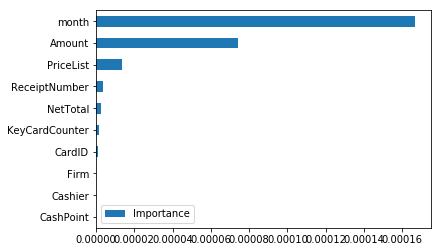

In [51]:
plot_variable_importance(X_train, y_train)

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


C:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [83]:
#use linear regression as the model
lr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05)
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train, y_train)
 
features_bool = np.array(rfe.support_)
features = np.array(X_train.columns)
result = features[features_bool]
print (result)
features_rank = rfe.ranking_
#print(features_rank)
rank = features_rank[features_bool]
print(rank)

['ItemNumber']
[1]


In [58]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False False False False False
 False False False False False False False]
[ 4 17 10 19  3  2  1  9  7  6 15  5 16 18 14 11 12 13  8]


In [7]:
import seaborn as sns

In [9]:
def heatMap(df, mirror):
    
    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
    plt.show()

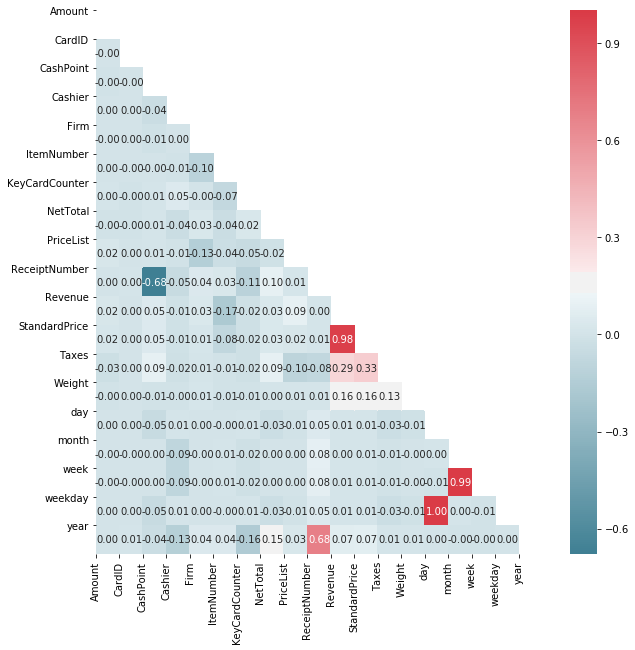

In [10]:
heatMap(dataGiesing,False)

In [47]:
 dataLehel.loc[(dataLehel["ItemDescription"] =="Rot 2,00" )&(dataLehel.year.isin([2016]))&(dataLehel.week.isin([4]))].head()

,Date,Time,CashPoint,ReceiptNumber,Cashier,PaymentType,CardID,Firm,PriceList,PositionType,ItemNumber,Taxes,Amount,Revenue,ItemDescription,NetTotal,StandardPrice,KeyCardCounter,Weight,year,month,week,day,weekday
1256384,2016-01-26,10:59,1,1554693,13,K/C,35483,10,1,V,365,19.0,1,2.0,"Rot 2,00",21.71,2.0,376,0,2016,1,4,1,1
1256386,2016-01-26,11:21,1,1554694,13,K/C,31191,10,1,V,365,19.0,1,2.0,"Rot 2,00",2.89,2.0,602,0,2016,1,4,1,1
1256436,2016-01-26,12:21,1,1554713,13,K/C,41261,11,0,V,365,19.0,1,2.0,"Rot 2,00",15.28,2.0,5693,0,2016,1,4,1,1
1256514,2016-01-26,12:39,1,1554748,13,K/C,38572,11,1,V,365,19.0,1,2.0,"Rot 2,00",10.37,2.0,2738,0,2016,1,4,1,1
1256535,2016-01-26,12:42,1,1554756,13,K/C,29311,10,1,V,365,19.0,1,2.0,"Rot 2,00",7.37,2.0,2701,0,2016,1,4,1,1


In [47]:
platG=dataGiesing[(dataGiesing.year.isin([2016]))]['ItemDescription'].unique()

In [44]:
platL=dataLehel[(dataLehel.year.isin([2016]))]['ItemDescription'].unique()